# ANALYSE DE DÉTECTION DE LA FRAUDE DE LA FRAUDE DE SANTÉ


Objectifs du projet

La fraude des fournisseurs est l'un des plus gros problèmes auxquels Medicare
 est confronté. Selon le gouvernement, les dépenses totales de Medicare ont 
augmenté de façon exponentielle en raison de fraudes dans les réclamations de
 Medicare. La fraude en matière de soins de santé est un crime organisé qui
 implique des pairs de prestataires, de médecins et de bénéficiaires agissant
 ensemble pour faire des allégations de fraude.

Une analyse rigoureuse des
 données Medicare a donné lieu à de nombreux médecins qui se livrent à la
 fraude. Ils adoptent des moyens par lesquels un code de diagnostic ambigu est
 utilisé pour adopter les procédures et les médicaments les plus coûteux. 
Les compagnies d'assurance sont les institutions les plus vulnérables touchées
 par ces mauvaises pratiques. Pour cette raison, les compagnies d'assurance 
ont augmenté leurs primes d'assurance et, par conséquent, les soins de santé 
deviennent de plus en plus coûteux.

La fraude et les abus en matière de soins
 de santé prennent plusieurs formes. Certains des types de fraude les plus 
courants par les prestataires sont:


a ) Facturation des services qui n'ont pas  été fournis.


b ) Soumission en double d'une réclamation pour le même service.


c ) Représentation erronée du service fourni.


d ) Charge pour un service plus complexe ou plus cher que celui réellement 
fourni.


e ) Facturation d'un service couvert lorsque le service effectivement fourni
 n'était pas couvert.


Énoncé du problème

L'objectif de ce projet est de "prévoir les prestataires potentiellement
 frauduleux" sur la base des réclamations déposées par eux, nous découvrirons 
également des variables importantes utiles pour détecter le comportement des
 prestataires potentiellement frauduleux. 
en outre, nous étudierons les schémas frauduleux dans les allégations du 
fournisseur pour comprendre le comportement futur des fournisseurs.


Introduction à l'ensemble de données

Aux fins de ce projet, nous examinons les demandes d'indemnisation des 
patients hospitalisés, les demandes d'hospitalisation et les détails des 
bénéficiaires de chaque fournisseur. 
Voyons leurs détails :


A ) Inpatient Data
	Ces données donnent un aperçu des réclamations 
déposées pour les patients admis dans les hôpitaux. 
Il fournit également des détails supplémentaires tels que leurs dates 
d'admission et de sortie et admet le code de diagnostic d.


B ) Outpatient Data
	Ces données fournissent des détails sur les 
réclamations déposées pour les patients qui visitent les hôpitaux et n'y sont
 pas admis.


C ) Beneficiary Details Data
	Ces données contiennent des détails KYC 
bénéficiaires tels que les conditions de santé, la région à laquelle ils 
appartiennent, etc.


In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,  confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Step 0: Load The Data

# BENEFICIARY DATA

In [351]:
df_ben = pd.read_csv('Train_Beneficiarydata.csv')

In [352]:
df_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [353]:
df_ben.shape

(138556, 25)

In [354]:
df_ben.describe

<bound method NDFrame.describe of             BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  \
0        BENE11001  1943-01-01  NaN       1     1                     0   
1        BENE11002  1936-09-01  NaN       2     1                     0   
2        BENE11003  1936-08-01  NaN       1     1                     0   
3        BENE11004  1922-07-01  NaN       1     1                     0   
4        BENE11005  1935-09-01  NaN       1     1                     0   
...            ...         ...  ...     ...   ...                   ...   
138551  BENE159194  1939-07-01  NaN       1     1                     0   
138552  BENE159195  1938-12-01  NaN       2     1                     0   
138553  BENE159196  1916-06-01  NaN       2     1                     0   
138554  BENE159197  1930-01-01  NaN       1     1                     0   
138555  BENE159198  1952-04-01  NaN       2     1                     0   

        State  County  NoOfMonths_PartACov  NoOfMonths_PartBCov  

In [355]:
df_ben['DOD'].value_counts()

2009-12-01    182
2009-10-01    168
2009-09-01    164
2009-11-01    149
2009-08-01    144
2009-07-01    141
2009-05-01    119
2009-06-01    119
2009-04-01     94
2009-03-01     91
2009-02-01     50
Name: DOD, dtype: int64

In [356]:
df_ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [357]:
# Valeurs Manquantes par colonnes
df_ben.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [358]:
# Valeurs redondantes
df_ben.drop_duplicates()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [359]:
df_ben['DOD'] = pd.to_datetime(df_ben['DOD'], format='%Y-%m-%d')
df_ben['DOB'] = pd.to_datetime(df_ben['DOB'], format='%Y-%m-%d')

In [360]:
df_ben["DOD"].max()

Timestamp('2009-12-01 00:00:00')

In [361]:
df_ben[df_ben.DOD == df_ben.DOD.max()]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,2,2,1,2,2,2,0,0,50,80
692,BENE11734,1929-04-01,2009-12-01,1,1,0,25,760,12,12,...,2,1,2,2,2,2,0,0,30,20
1667,BENE12787,1943-04-01,2009-12-01,1,1,0,42,450,12,12,...,1,2,2,1,2,2,0,0,1060,600
2766,BENE13946,1912-03-01,2009-12-01,2,1,0,15,450,12,12,...,2,2,2,2,2,2,0,0,30,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130779,BENE150858,1937-11-01,2009-12-01,1,1,0,31,200,12,12,...,2,2,2,1,2,2,0,0,1200,400
131036,BENE151130,1929-01-01,2009-12-01,1,1,0,5,400,12,12,...,1,1,1,2,2,2,7000,1068,100,0
135887,BENE156328,1936-10-01,2009-12-01,1,1,0,14,141,12,12,...,2,1,2,2,2,2,0,0,100,30
136789,BENE157302,1942-02-01,2009-12-01,1,1,0,23,680,12,12,...,2,2,1,2,2,2,0,0,1100,0


La valeur DOD la plus récente est le 1er décembre 2009, ce qui indique que les données sur les détails du bénéficiaire datent de 2009.

Par conséquent, les valeurs NaN dans les colonnes DOD sont remplies avec '2009-12-01'

In [362]:
#remplacer les valeurs nulles de la colonne DOD
df_ben["DOD"].fillna("2009-12-01", inplace = True)

In [363]:
# Création de la colonne Âge
df_ben['Age'] = df_ben['DOD'].dt.year - df_ben['DOB'].dt.year

In [364]:
# Valeurs Manquantes par colonnes
df_ben.isnull().sum() 

BeneID                             0
DOB                                0
DOD                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
dtype: int64

# Analyse univarie

# Analyse et visualisation des variables


# Gender

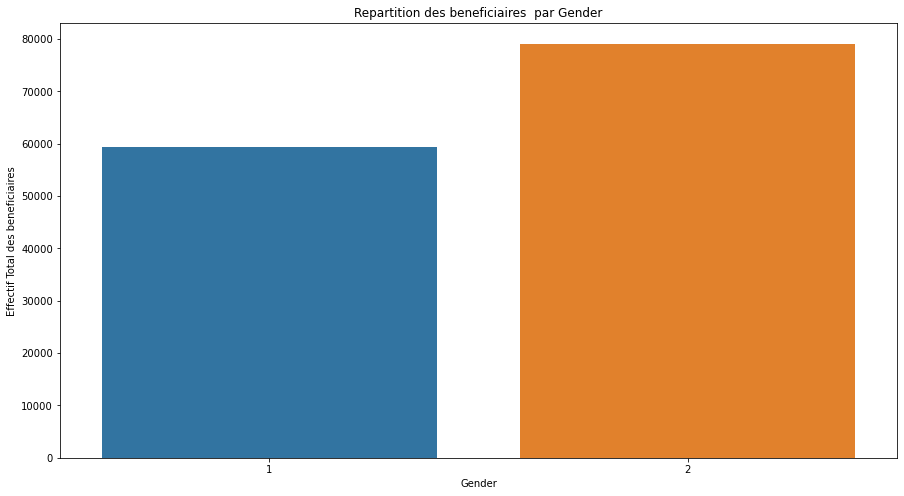

In [365]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['Gender'])
plt.title("Repartition des beneficiaires  par Gender")
plt.xlabel("Gender")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# Age

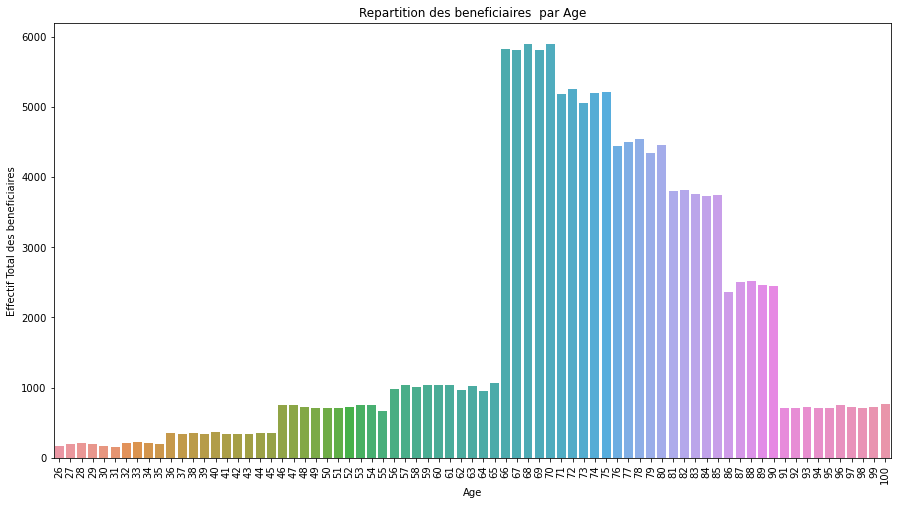

In [366]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['Age'])
plt.title("Repartition des beneficiaires  par Age")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# Race

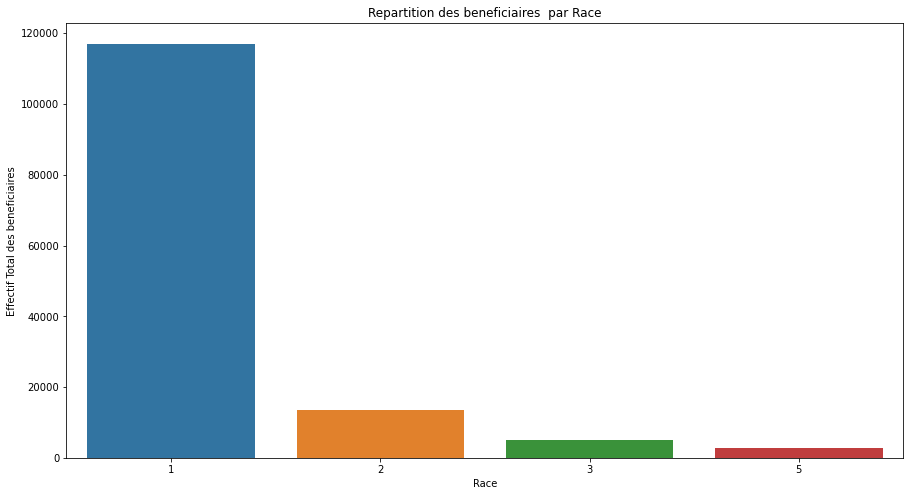

In [367]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['Race'])
plt.title("Repartition des beneficiaires  par Race")
plt.xlabel("Race")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# RenalDiseaseIndicator

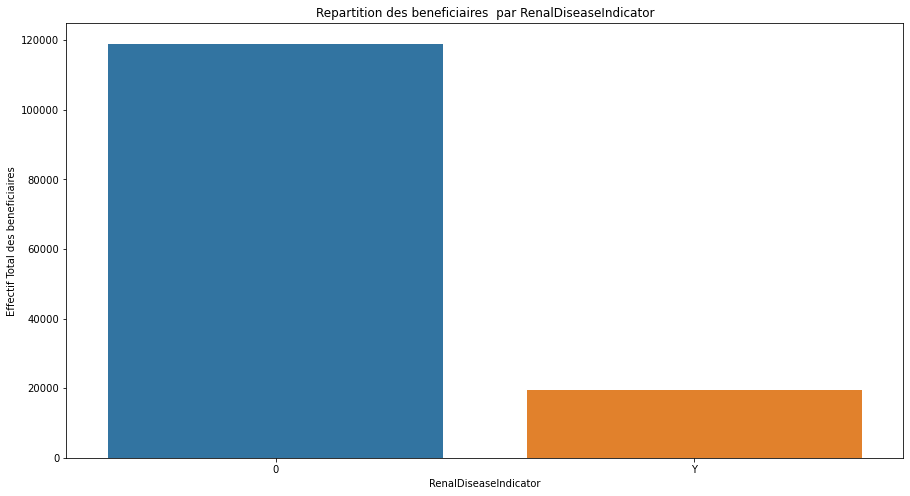

In [368]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['RenalDiseaseIndicator'])
plt.title("Repartition des beneficiaires  par RenalDiseaseIndicator")
plt.xlabel("RenalDiseaseIndicator")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# State

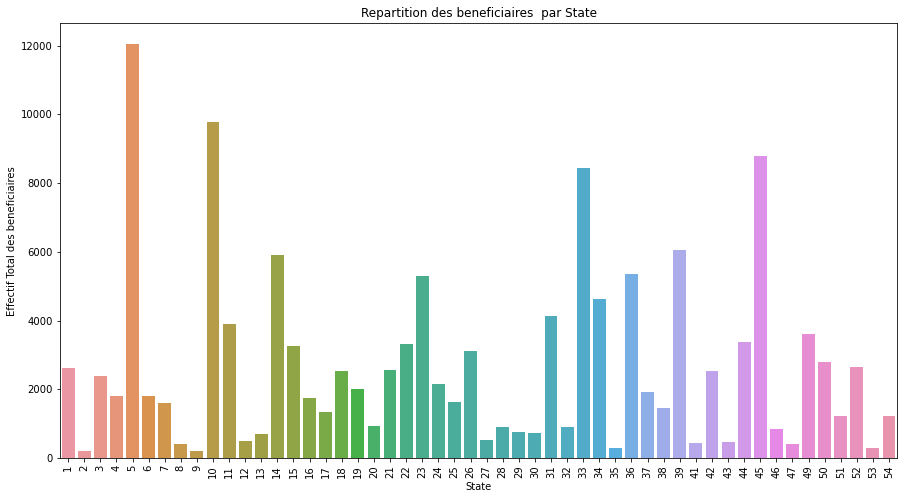

In [369]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['State'])
plt.title("Repartition des beneficiaires  par State")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# County

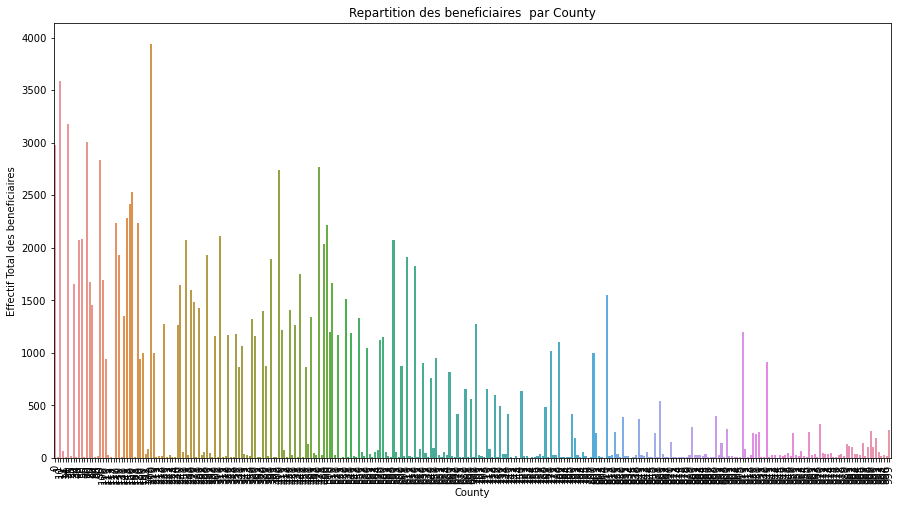

In [370]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['County'])
plt.title("Repartition des beneficiaires  par County")
plt.xlabel("County")
plt.xticks(rotation=90)
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# NoOfMonths_PartACov

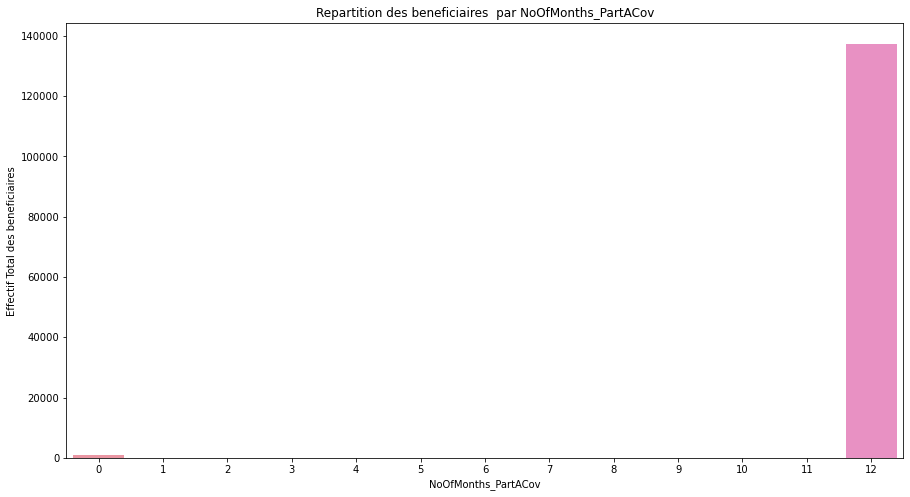

In [371]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['NoOfMonths_PartACov'])
plt.title("Repartition des beneficiaires  par NoOfMonths_PartACov")
plt.xlabel("NoOfMonths_PartACov")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# NoOfMonths_PartBCov

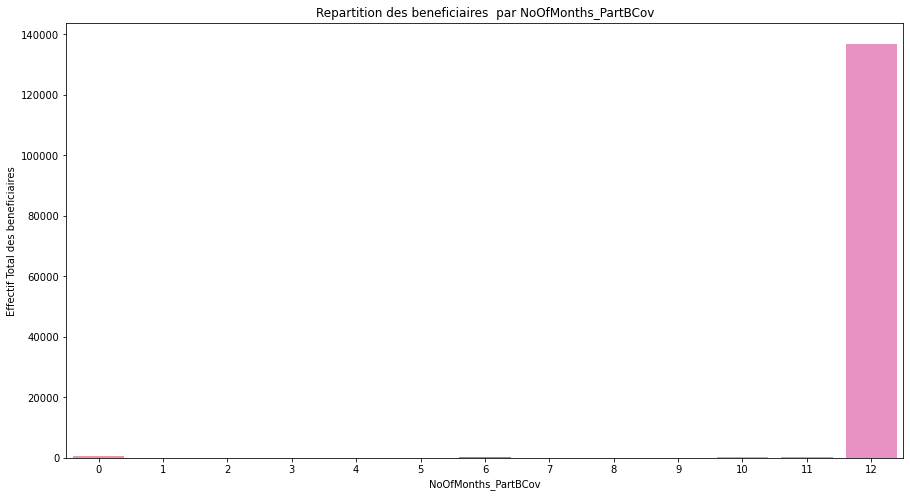

In [372]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['NoOfMonths_PartBCov'])
plt.title("Repartition des beneficiaires  par NoOfMonths_PartBCov")
plt.xlabel("NoOfMonths_PartBCov")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_Alzheimer

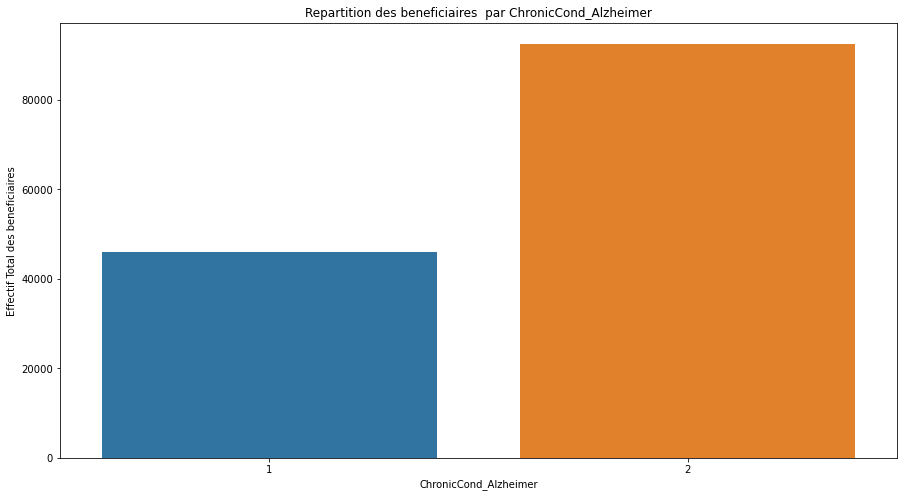

In [373]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_Alzheimer'])
plt.title("Repartition des beneficiaires  par ChronicCond_Alzheimer")
plt.xlabel("ChronicCond_Alzheimer")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_Heartfailure

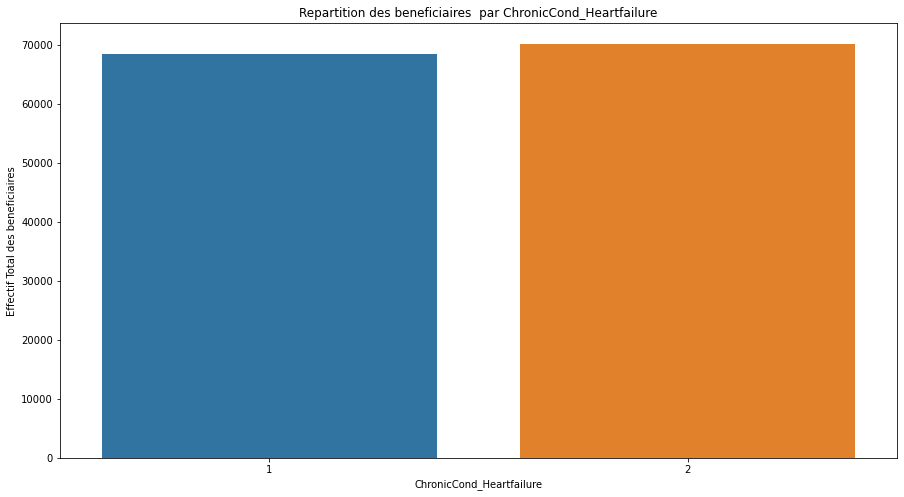

In [374]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_Heartfailure'])
plt.title("Repartition des beneficiaires  par ChronicCond_Heartfailure")
plt.xlabel("ChronicCond_Heartfailure")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_KidneyDisease 

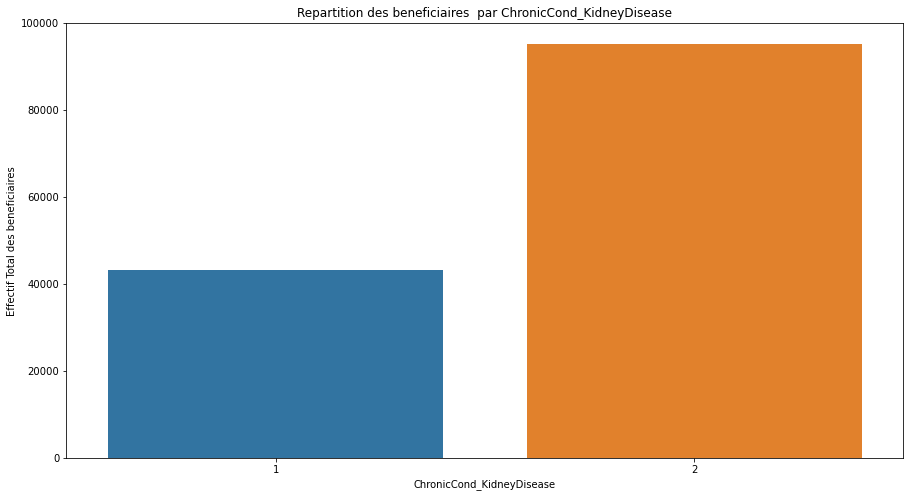

In [375]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_KidneyDisease'])
plt.title("Repartition des beneficiaires  par ChronicCond_KidneyDisease")
plt.xlabel("ChronicCond_KidneyDisease")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_Cancer

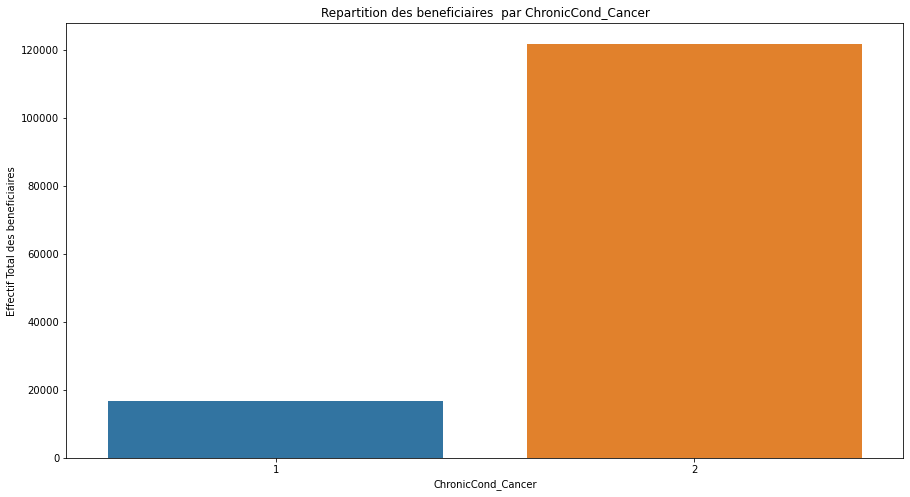

In [376]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_Cancer'])
plt.title("Repartition des beneficiaires  par ChronicCond_Cancer")
plt.xlabel("ChronicCond_Cancer")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_ObstrPulmonary

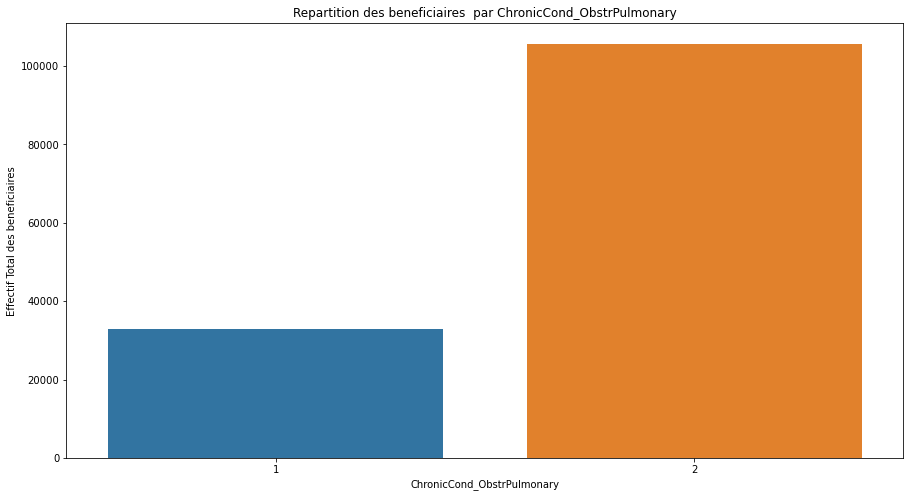

In [377]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_ObstrPulmonary'])
plt.title("Repartition des beneficiaires  par ChronicCond_ObstrPulmonary")
plt.xlabel("ChronicCond_ObstrPulmonary")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_Depression

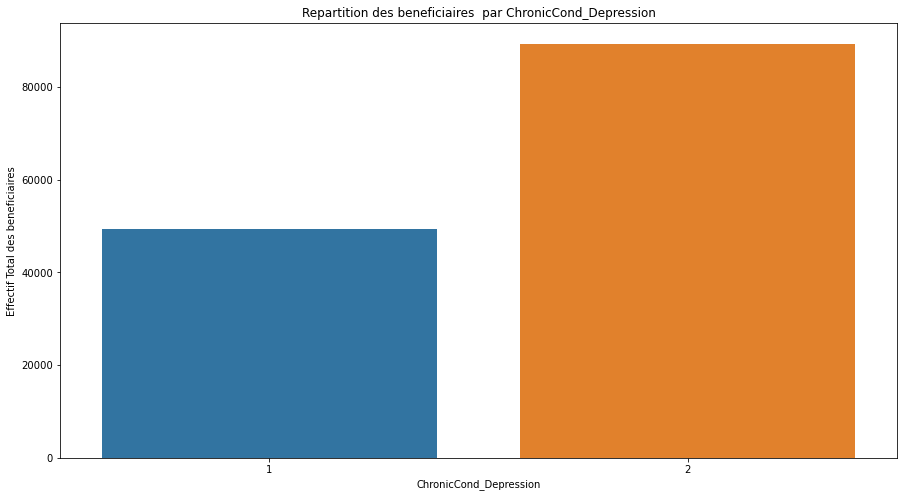

In [378]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_Depression'])
plt.title("Repartition des beneficiaires  par ChronicCond_Depression")
plt.xlabel("ChronicCond_Depression")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_Diabetes

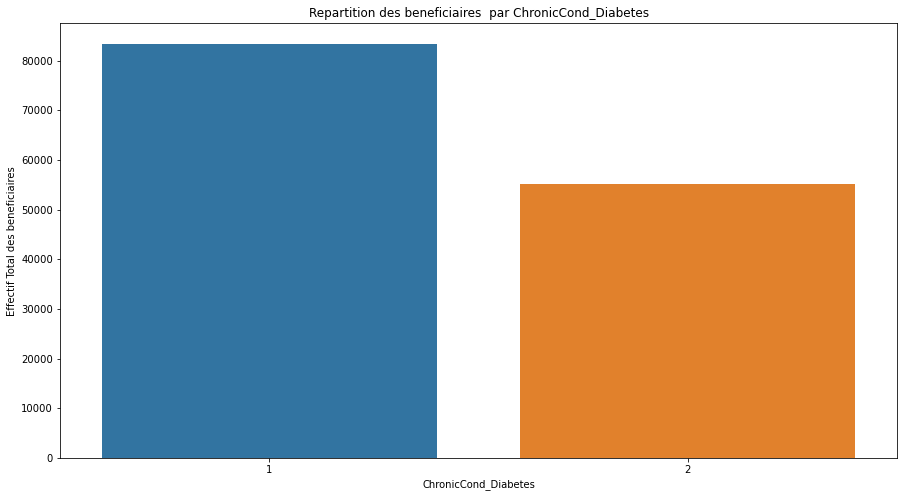

In [379]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_Diabetes'])
plt.title("Repartition des beneficiaires  par ChronicCond_Diabetes")
plt.xlabel("ChronicCond_Diabetes")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_IschemicHeart 

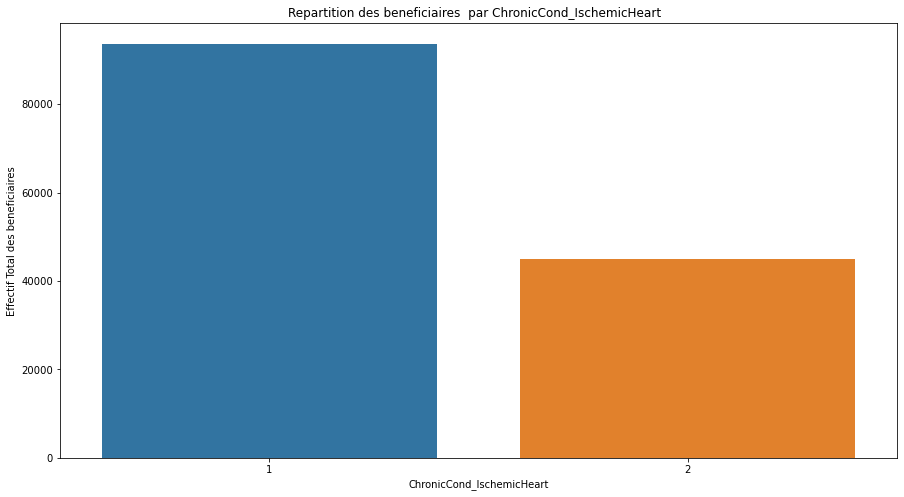

In [380]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_IschemicHeart'])
plt.title("Repartition des beneficiaires  par ChronicCond_IschemicHeart  ")
plt.xlabel("ChronicCond_IschemicHeart")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_Osteoporasis 

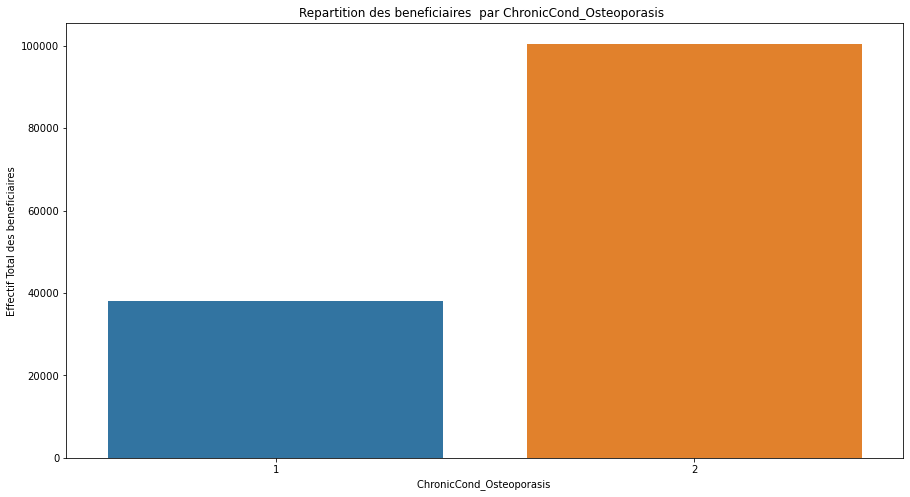

In [381]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_Osteoporasis'])
plt.title("Repartition des beneficiaires  par ChronicCond_Osteoporasis  ")
plt.xlabel("ChronicCond_Osteoporasis ")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_rheumatoidarthritis

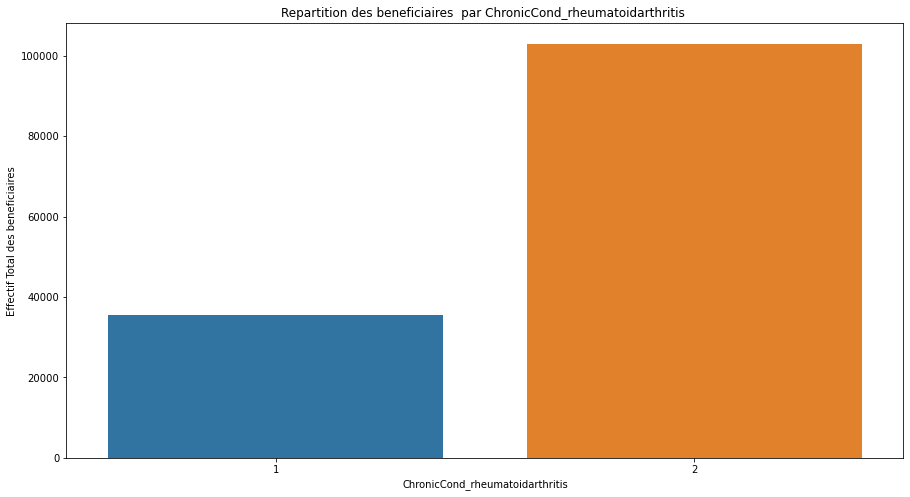

In [382]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_rheumatoidarthritis'])
plt.title("Repartition des beneficiaires  par ChronicCond_rheumatoidarthritis ")
plt.xlabel("ChronicCond_rheumatoidarthritis")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# ChronicCond_stroke

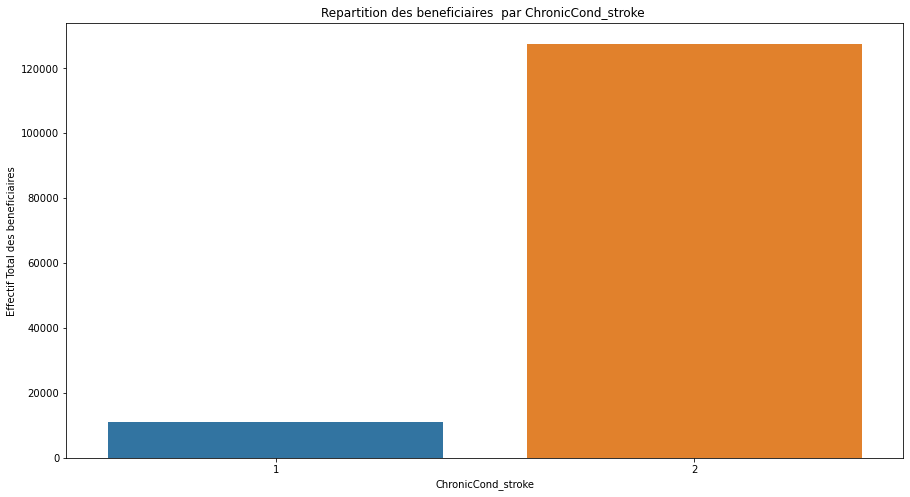

In [383]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_ben['ChronicCond_stroke'])
plt.title("Repartition des beneficiaires  par ChronicCond_stroke ")
plt.xlabel("ChronicCond_stroke")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

# Analyse bivarie

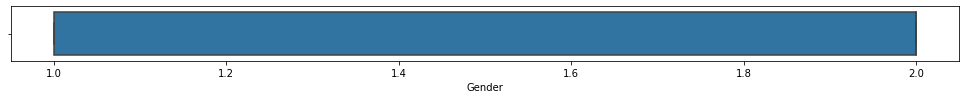

In [384]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'Gender')
plt.show()

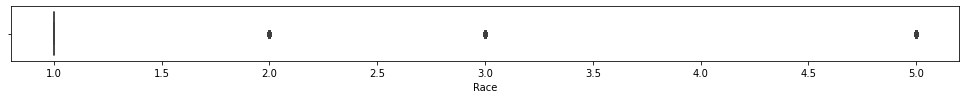

In [385]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'Race')
plt.show()

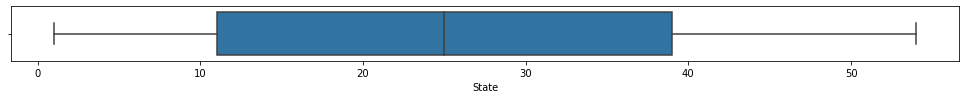

In [386]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'State')
plt.show()

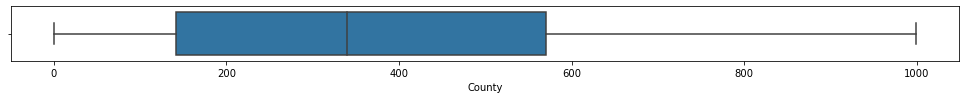

In [387]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'County')
plt.show()

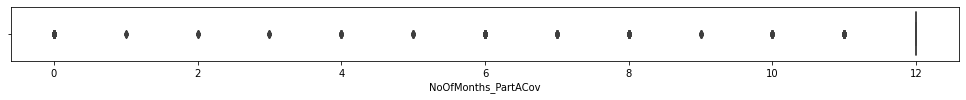

In [388]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'NoOfMonths_PartACov')
plt.show() 

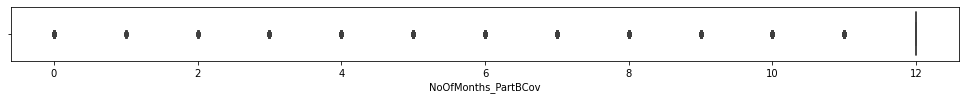

In [389]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'NoOfMonths_PartBCov')
plt.show() 

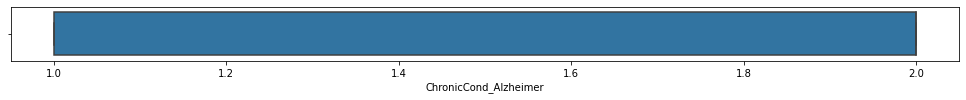

In [390]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_Alzheimer')
plt.show() 

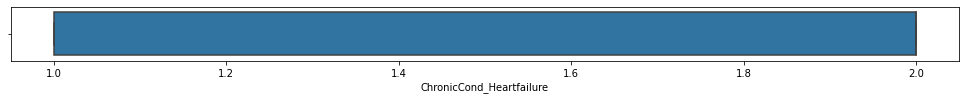

In [391]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_Heartfailure')
plt.show() 

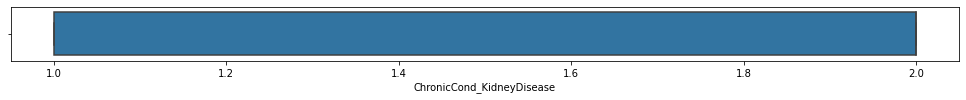

In [392]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_KidneyDisease')
plt.show() 

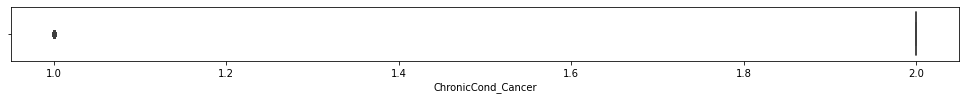

In [393]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_Cancer')
plt.show() 

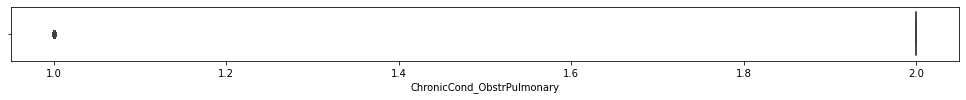

In [394]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_ObstrPulmonary')
plt.show() 

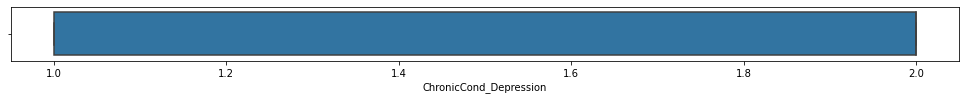

In [395]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_Depression')
plt.show() 

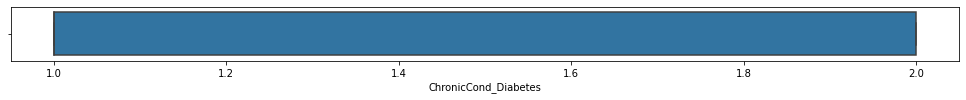

In [396]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_Diabetes')
plt.show() 

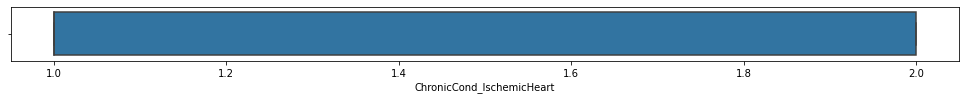

In [397]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_IschemicHeart')
plt.show() 

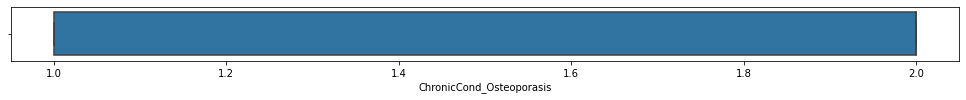

In [398]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_Osteoporasis')
plt.show() 

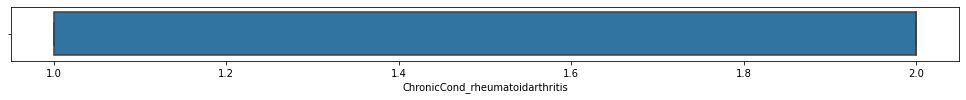

In [399]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_rheumatoidarthritis')
plt.show() 

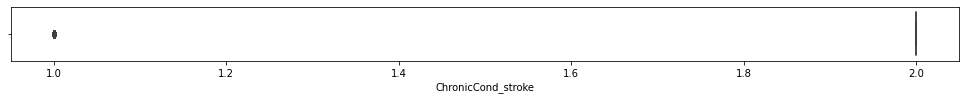

In [400]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'ChronicCond_stroke')
plt.show() 

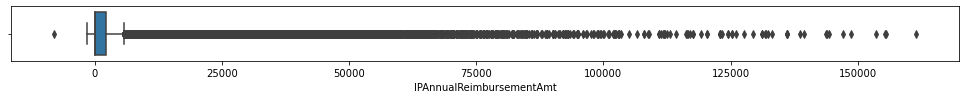

In [401]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'IPAnnualReimbursementAmt')
plt.show() 

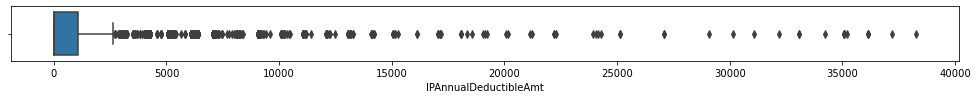

In [402]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'IPAnnualDeductibleAmt')
plt.show() 

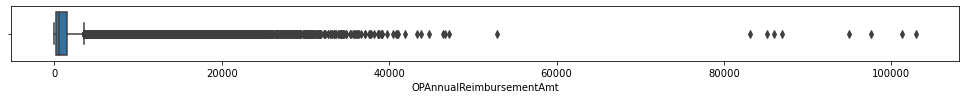

In [403]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'OPAnnualReimbursementAmt')
plt.show() 

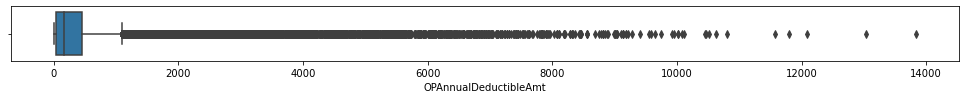

In [404]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'OPAnnualDeductibleAmt')
plt.show() 

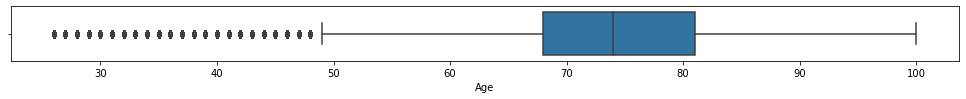

In [405]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_ben, x = 'Age')
plt.show() 

# PROVIDER DATA

In [406]:
df_prov = pd.read_csv('Train.csv')

In [407]:
df_prov.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [408]:
df_prov.shape

(5410, 2)

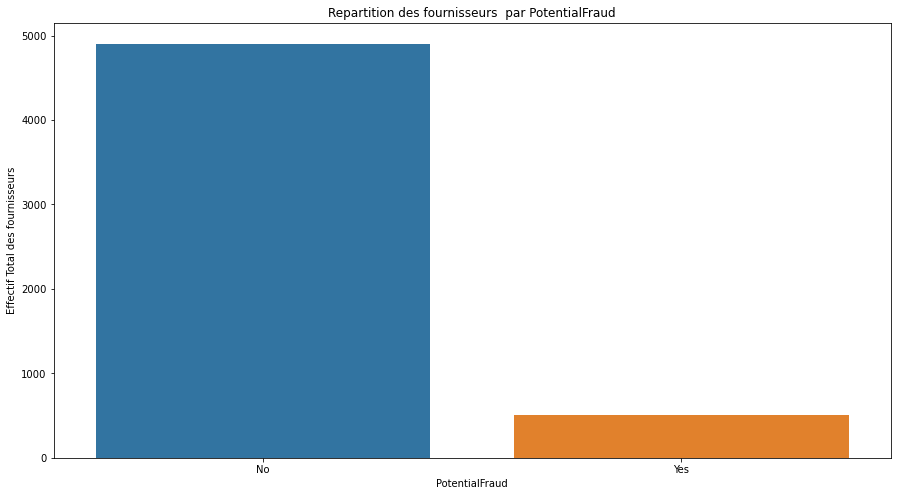

In [409]:
plt.figure(figsize = (15,8))
sns.countplot(x = df_prov['PotentialFraud'])
plt.title("Repartition des fournisseurs  par PotentialFraud")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des fournisseurs')
plt.show()

In [410]:
df_prov_y = df_prov[df_prov.PotentialFraud == 'Yes']
df_prov_y.head()

,Provider,PotentialFraud
1,PRV51003,Yes
3,PRV51005,Yes
13,PRV51021,Yes
25,PRV51037,Yes
37,PRV51052,Yes


In [411]:
df_prov_y.shape

(506, 2)

# INPATIENT DATA

In [412]:
df_inp = pd.read_csv('Train_Inpatientdata.csv')

In [413]:
df_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [414]:
df_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [415]:
df_inp.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [416]:
df_inp.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [417]:
df_inp.shape

(40474, 30)

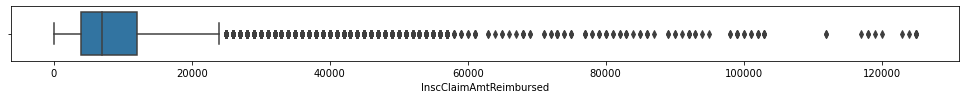

In [418]:
plt.figure(figsize = (17,1))
sns.boxplot(data=df_inp, x = 'InscClaimAmtReimbursed')
plt.show() 

In [419]:
df_inp.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [420]:
#remplacer les valeurs manquantes des colonnes suivantes: Attendingphsysician,OperatingPhysician,OtherPhysician 
df_inp['AttendingPhysician'] = df_inp['AttendingPhysician'].fillna("None")
df_inp['OperatingPhysician'] = df_inp['OperatingPhysician'].fillna("None")
df_inp['OtherPhysician'] = df_inp['OtherPhysician'].fillna("None")

In [421]:
df_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [422]:
df_inp.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [423]:
# remplacer toutes les autres valeurs manquantes par '0'
df_inp = df_inp.fillna("0")
df_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2724,19889,5849,0,0,0,0,0,0,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,0,0,0,0,7092.0,0,0,0,0,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,0,0,0,0,0,0,0,0,0,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,0,331.0,0,0,0,0,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,5119,29620,20300,0,3893.0,0,0,0,0,0


In [424]:
df_inp['BeneID'].nunique()

31289

In [425]:
df_inp['BeneID'].value_counts()

BENE134170    8
BENE64791     7
BENE121796    7
BENE117116    7
BENE119457    7
             ..
BENE67673     1
BENE67658     1
BENE67655     1
BENE67653     1
BENE159188    1
Name: BeneID, Length: 31289, dtype: int64

In [426]:
# creation d'une colonne denommee benonreclam dans le dataset beneficiaires
df_ben["benonreclam"] = df_ben["BeneID"].isin(df_ben["BeneID"])

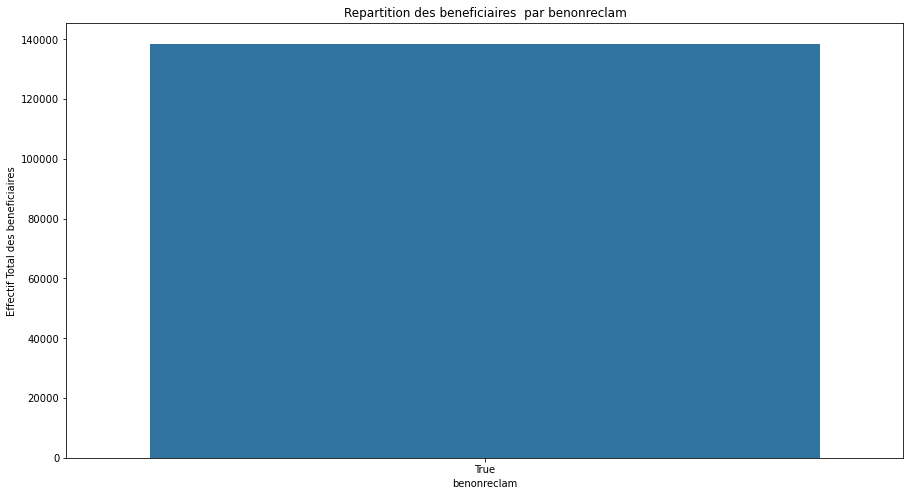

In [432]:
plt.figure(figsize = (15,8))
sns.countplot(x='benonreclam',data=df_ben,)
plt.title("Repartition des beneficiaires  par benonreclam")
plt.xlabel('benonreclam')
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

In [433]:
#creer une colonne denommee duree de reclamation durereclam
df_inp['ClaimEndDt'] = pd.to_datetime(df_inp['ClaimEndDt'], format='%Y-%m-%d')
df_inp['ClaimStartDt'] = pd.to_datetime(df_inp['ClaimStartDt'], format='%Y-%m-%d')
df_inp["durereclam"] = (df_inp['ClaimEndDt'] - df_inp['ClaimStartDt']).dt.days
df_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,durereclam
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,19889,5849,0,0,0,0,0,0,0,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,0,0,0,7092.0,0,0,0,0,0,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,0,0,0,0,0,0,0,0,0,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,0,331.0,0,0,0,0,0,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,29620,20300,0,3893.0,0,0,0,0,0,17


In [434]:
# FUSIONNER INPATIENTS DATA TO PROVIDER DATA
df_inp = df_inp.join(df_prov.set_index('Provider'), on='Provider')

In [435]:
df_inp.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'durereclam', 'PotentialFraud'],
      dtype='object')

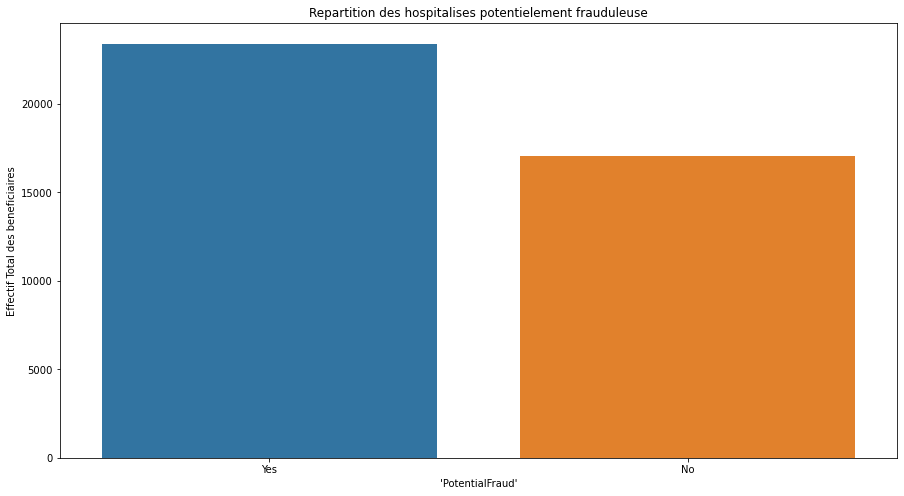

In [436]:
plt.figure(figsize = (15,8))
sns.countplot(data = df_inp,x =df_inp.PotentialFraud)
plt.title("Repartition des hospitalises potentielement frauduleuse")
plt.xlabel("'PotentialFraud'")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

In [437]:
#AJOUTER AUX DATASETS BENEFICIAIRES LE DATASET RECLAM
df_inp_total = df_inp.join(df_ben.set_index('BeneID'), on='BeneID')
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,1,2,1,1,36000,3204,60,70,66,True
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,2,1,1,36000,3204,60,70,66,True
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,2,1,1,36000,3204,60,70,66,True
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,2,1,1,5000,1068,250,320,95,True
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,1,2,2,2,21260,2136,120,100,71,True


# Diseases

# ChronicCond_Alzheimer

In [438]:
df_inp_Alz = df_inp_total[df_inp_total['ChronicCond_Alzheimer'] == 1]
df_inp_Alz.shape

(20401, 58)

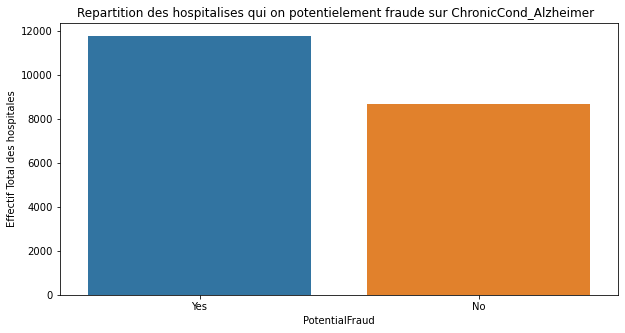

In [439]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Alz['PotentialFraud'],data = df_inp_total)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Alzheimer  ")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [440]:
df_inp_Alz_not_fraud = df_inp_Alz[df_inp_Alz['PotentialFraud'] == "No"]
df_inp_Alz_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,2,1,1,36000,3204,60,70,66,True
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,2,1,1,36000,3204,60,70,66,True
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,1,1,1,2,8000,1068,860,50,70,True
12,BENE11037,CLM65412,2009-08-26,2009-08-29,PRV55846,3000,PHY363584,PHY364336,None,2009-08-26,...,1,1,1,1,3150,1068,160,50,69,True
25,BENE11067,CLM37565,2009-02-09,2009-02-15,PRV51710,4000,PHY433429,None,None,2009-02-09,...,1,1,2,2,4000,1068,2150,570,45,True


In [441]:
df_inp_Alz_not_fraud.shape

(8645, 58)

In [442]:
df_inp_Alz_not_fraud.describe()

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.0,8645.00000,...,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,9509.234239,5.726316,1.595836,1.241411,25.839445,401.755003,11.927935,11.936726,1.0,1.21203,...,1.140081,1.099248,1.612608,1.605321,1.791787,18806.006940,2119.765414,2093.761712,592.317062,73.998728
std,9429.560515,5.466067,0.490758,0.681376,15.398340,269.792216,0.899644,0.787335,0.0,0.40877,...,0.347091,0.299012,0.487183,0.488810,0.406053,18132.267012,1960.807352,3983.330038,1009.276537,13.707288
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1068.000000,-50.000000,0.000000,26.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,12.000000,12.000000,1.0,1.00000,...,1.000000,1.000000,1.000000,1.000000,2.000000,7000.000000,1068.000000,260.000000,60.000000,68.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,390.000000,12.000000,12.000000,1.0,1.00000,...,1.000000,1.000000,2.000000,2.000000,2.000000,13000.000000,2136.000000,890.000000,260.000000,75.000000
75%,11000.000000,7.000000,2.000000,1.000000,39.000000,590.000000,12.000000,12.000000,1.0,1.00000,...,1.000000,1.000000,2.000000,2.000000,2.000000,24180.000000,2136.000000,2220.000000,700.000000,83.000000
max,125000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,1.0,2.00000,...,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,36136.000000,83160.000000,10800.000000,100.000000


In [443]:
df_inp_Alz_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [444]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Alz_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [445]:
conditions = [
    (df_inp_Alz['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Alz['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Alz['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Alz['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Alz['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Alz['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Alz['Alz_claim_ip_insurance_tier'] = np.select(conditions, values)

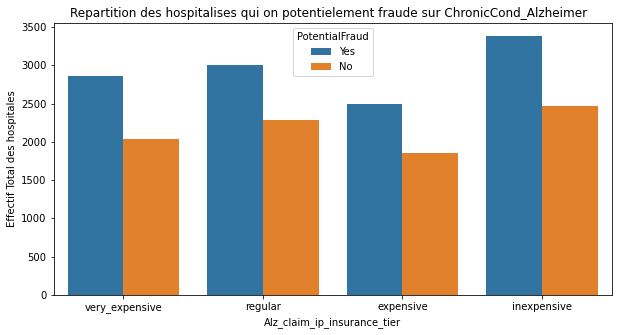

In [446]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Alz['Alz_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Alz)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Alzheimer  ")
plt.xlabel("Alz_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [447]:
df_inp_Alz.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2,1,1,36000,3204,60,70,66,True,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,2,1,1,36000,3204,60,70,66,True,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,2,1,1,36000,3204,60,70,66,True,regular
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2,1,1,22000,2136,1400,840,69,True,expensive
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,1,1,2,8000,1068,860,50,70,True,expensive


In [448]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Alz_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_inp_Alz['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Alz['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Alz['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Alz['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Alz['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Alz['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Alz['Alz_claim_ip_insurance_tier'] = np.select(conditions, values)

In [449]:
df_inp_total['Alz_claim_ip_insurance_tier'] = df_inp_Alz['Alz_claim_ip_insurance_tier']
df_inp_total["Alz_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,2,1,1,36000,3204,60,70,66,True,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,2,1,1,36000,3204,60,70,66,True,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,2,1,1,36000,3204,60,70,66,True,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,1,1,5000,1068,250,320,95,True,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,2,21260,2136,120,100,71,True,None


# Heartfailure

In [450]:
df_inp_Hf = df_inp_total[df_inp_total['ChronicCond_Heartfailure'] == 1]
df_inp_Hf.shape

(29215, 59)

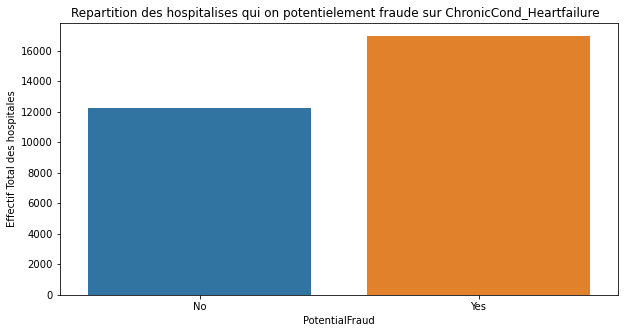

In [451]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Hf['PotentialFraud'],data = df_inp_Hf)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Heartfailure  ")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [452]:
df_inp_Hf_not_fraud = df_inp_Hf[df_inp_Hf['PotentialFraud'] == "No"]

In [453]:
df_inp_Hf_not_fraud.shape

(12245, 59)

In [454]:
df_inp_Hf_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,2,1,1,5000,1068,250,320,95,True,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,2,21260,2136,120,100,71,True,None
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,1,1,2,8000,1068,860,50,70,True,expensive
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,None,None,2009-08-06,...,1,2,2,23650,2136,40,0,65,True,None
12,BENE11037,CLM65412,2009-08-26,2009-08-29,PRV55846,3000,PHY363584,PHY364336,None,2009-08-26,...,1,1,1,3150,1068,160,50,69,True,inexpensive


In [455]:
df_inp_Hf_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [456]:
df_inp_Hf_not_fraud.describe()

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.0,...,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000,12245.000000
mean,9912.136382,5.762270,1.581298,1.243691,25.739241,404.292609,11.921356,11.937444,1.443691,1.0,...,1.141200,1.096121,1.628420,1.612903,1.809473,18869.224990,2036.448510,2147.536137,602.314822,73.922662
std,9854.689773,5.518412,0.493366,0.686883,15.502812,269.528443,0.946514,0.788375,0.496840,0.0,...,0.348242,0.294769,0.483247,0.487106,0.392733,18289.888991,1811.536378,4164.887430,1040.716557,13.444958
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-20.000000,0.000000,26.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,12.000000,12.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,2.000000,7000.000000,1068.000000,250.000000,60.000000,68.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,400.000000,12.000000,12.000000,1.000000,1.0,...,1.000000,1.000000,2.000000,2.000000,2.000000,13000.000000,1368.000000,890.000000,260.000000,75.000000
75%,12000.000000,7.000000,2.000000,1.000000,39.000000,600.000000,12.000000,12.000000,2.000000,1.0,...,1.000000,1.000000,2.000000,2.000000,2.000000,24120.000000,2136.000000,2280.000000,700.000000,83.000000
max,125000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,1.0,...,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,97510.000000,12090.000000,100.000000


In [457]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Hf_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [458]:
conditions = [
    (df_inp_Hf['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Hf['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Hf['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Hf['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Hf['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Hf['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Hf['Hf_claim_ip_insurance_tier'] = np.select(conditions, values)

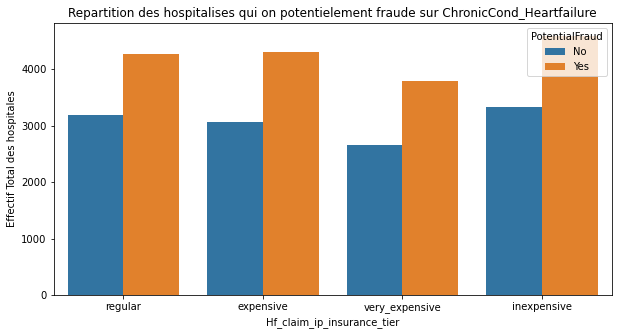

In [459]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Hf['Hf_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Hf)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Heartfailure")
plt.xlabel("Hf_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [460]:
df_inp_total['Hf_claim_ip_insurance_tier'] = df_inp_Hf['Hf_claim_ip_insurance_tier']
df_inp_total["Hf_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,1,1,36000,3204,60,70,66,True,very_expensive,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,1,36000,3204,60,70,66,True,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,66,True,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,95,True,None,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,21260,2136,120,100,71,True,None,expensive


# KidneyDisease

In [461]:
df_inp_Kd = df_inp_total[df_inp_total['ChronicCond_KidneyDisease'] == 1]
df_inp_Kd.shape

(24356, 60)

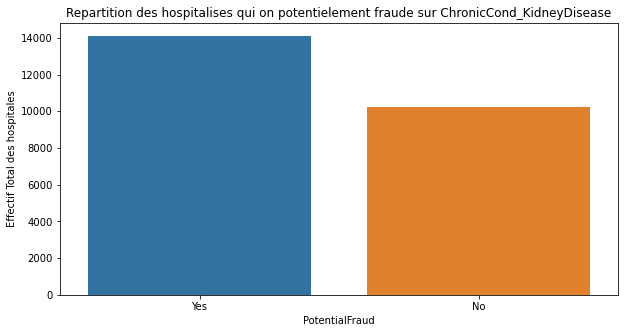

In [462]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Kd['PotentialFraud'],data = df_inp_Kd)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_KidneyDisease")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [463]:
df_inp_Kd_not_fraud = df_inp_Kd[df_inp_Kd['PotentialFraud'] == "No"]

In [464]:
df_inp_Kd_not_fraud.shape

(10253, 60)

In [465]:
df_inp_Kd_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,1,36000,3204,60,70,66,True,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,1,36000,3204,60,70,66,True,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,5000,1068,250,320,95,True,None,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,2,21260,2136,120,100,71,True,None,expensive
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,None,None,2009-08-06,...,2,2,23650,2136,40,0,65,True,None,regular


In [466]:
df_inp_Kd_not_fraud.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                                object
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                          object
DischargeDt                                object
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [467]:
df_inp_Kd_not_fraud.describe()

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,...,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000,10253.000000
mean,10336.053838,6.000293,1.581293,1.246172,25.619721,404.246269,11.915244,11.940310,1.433922,1.185409,...,1.122696,1.093143,1.624110,1.608017,1.798986,20328.513606,2134.983712,2371.795572,662.725446,73.907832
std,10198.497253,5.625306,0.493371,0.690543,15.457253,270.107668,0.982055,0.756134,0.495639,0.388648,...,0.328104,0.290648,0.484375,0.488217,0.400778,19031.472045,1912.861911,4375.138317,1134.114015,13.561560
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-10.000000,0.000000,26.000000
25%,4000.000000,3.000000,1.000000,1.000000,11.000000,170.000000,12.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,7820.000000,1068.000000,280.000000,70.000000,68.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,400.000000,12.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,14000.000000,2136.000000,940.000000,280.000000,75.000000
75%,12000.000000,7.000000,2.000000,1.000000,39.000000,600.000000,12.000000,12.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,26130.000000,2136.000000,2490.000000,770.000000,83.000000
max,125000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,52900.000000,12090.000000,100.000000


In [468]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Kd_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [469]:
conditions = [
    (df_inp_Kd['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Kd['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Kd['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Kd['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Kd['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Kd['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Kd['Kd_claim_insurance_tier'] = np.select(conditions, values)

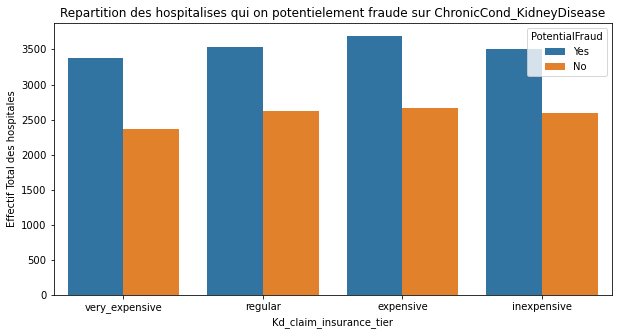

In [470]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Kd['Kd_claim_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Kd)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_KidneyDisease")
plt.xlabel("Kd_claim_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [471]:
df_inp_total['Kd_claim_insurance_tier'] = df_inp_Kd['Kd_claim_insurance_tier']
df_inp_total["Kd_claim_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,1,36000,3204,60,70,66,True,very_expensive,None,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,1,36000,3204,60,70,66,True,regular,None,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,1,36000,3204,60,70,66,True,regular,None,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,5000,1068,250,320,95,True,None,regular,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2,21260,2136,120,100,71,True,None,expensive,expensive


# Cancer

In [472]:
df_inp_Ca = df_inp_total[df_inp_total['ChronicCond_Cancer'] == 1]
df_inp_Ca.shape

(7729, 61)

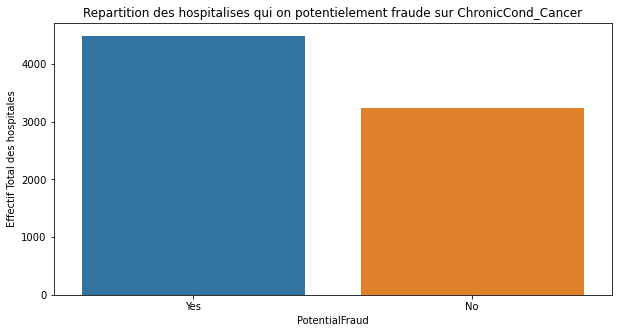

In [473]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Ca['PotentialFraud'],data = df_inp_Ca)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Cancer")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [474]:
df_inp_Ca_not_fraud = df_inp_Ca[df_inp_Ca['PotentialFraud'] == "No"]

In [475]:
df_inp_Ca_not_fraud.shape

(3241, 61)

In [476]:
df_inp_Ca_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,None,2009-01-02,...,2,8000,1068,860,50,70,True,expensive,expensive,None
99,BENE11349,CLM36790,2009-02-03,2009-02-07,PRV54653,12000,PHY311469,PHY333175,None,2009-02-03,...,2,12160,1068,460,20,61,True,None,expensive,expensive
103,BENE11366,CLM39427,2009-02-21,2009-02-23,PRV55846,0,PHY321109,PHY324538,None,2009-02-21,...,2,5440,2136,4050,310,77,True,inexpensive,inexpensive,inexpensive
104,BENE11374,CLM59661,2009-07-14,2009-07-15,PRV54917,3000,PHY384992,None,None,2009-07-14,...,2,3000,1068,1770,510,90,True,inexpensive,inexpensive,inexpensive
107,BENE11380,CLM51126,2009-05-14,2009-05-26,PRV54348,17000,PHY370193,PHY312648,None,2009-05-14,...,2,27130,2136,280,220,81,True,None,very_expensive,None


In [477]:
df_inp_Ca_not_fraud.dtypes

BeneID                                 object
ClaimID                                object
ClaimStartDt                   datetime64[ns]
ClaimEndDt                     datetime64[ns]
Provider                               object
                                    ...      
Age                                     int64
benonreclam                              bool
Alz_claim_ip_insurance_tier            object
Hf_claim_ip_insurance_tier             object
Kd_claim_insurance_tier                object
Length: 61, dtype: object

In [478]:
df_inp_Ca_not_fraud.describe()

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,...,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,9886.701635,5.780623,1.558470,1.219377,25.538106,399.265042,11.924406,11.944153,1.457266,1.232027,...,1.149028,1.099969,1.628818,1.593335,1.818883,19559.506325,2099.074360,2071.693922,590.763345,74.011108
std,9367.877819,5.408984,0.496646,0.645264,15.232514,269.047951,0.914641,0.724120,0.498247,0.422191,...,0.356171,0.300005,0.483196,0.491287,0.385174,18306.488472,1844.356824,3555.998314,858.181492,12.652838
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1068.000000,-10.000000,0.000000,26.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,12.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,7060.000000,1068.000000,300.000000,80.000000,68.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,390.000000,12.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,14000.000000,2136.000000,1020.000000,300.000000,75.000000
75%,12000.000000,7.000000,2.000000,1.000000,39.000000,590.000000,12.000000,12.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,26000.000000,2136.000000,2570.000000,780.000000,83.000000
max,102000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,153580.000000,38272.000000,85960.000000,9400.000000,100.000000


In [479]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Ca_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_inp_Ca['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Ca['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Ca['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Ca['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Ca['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Ca['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Ca['Ca_claim_ip_insurance_tier'] = np.select(conditions, values)

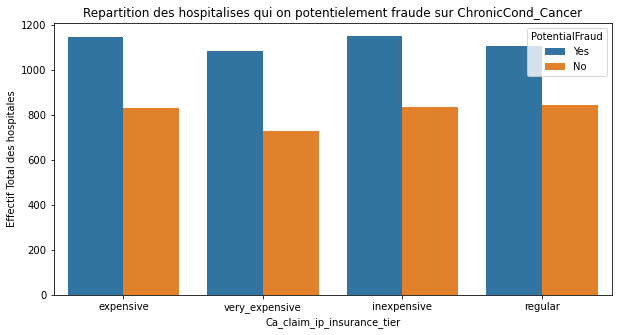

In [480]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Ca['Ca_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Ca)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Cancer")
plt.xlabel("Ca_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [481]:
df_inp_total['Ca_claim_ip_insurance_tier'] = df_inp_Ca['Ca_claim_ip_insurance_tier']
df_inp_total["Ca_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,36000,3204,60,70,66,True,very_expensive,None,very_expensive,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,36000,3204,60,70,66,True,regular,None,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,36000,3204,60,70,66,True,regular,None,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,5000,1068,250,320,95,True,None,regular,regular,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,21260,2136,120,100,71,True,None,expensive,expensive,None


# ObstrPulmonary

In [482]:
df_inp_Obs = df_inp_total[df_inp_total['ChronicCond_ObstrPulmonary'] == 1]
df_inp_Obs.shape

(19393, 62)

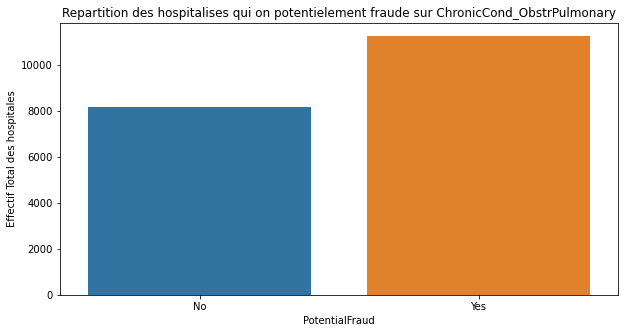

In [483]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Obs['PotentialFraud'],data = df_inp_Obs)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_ObstrPulmonary")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [484]:
df_inp_Obs_not_fraud = df_inp_Obs[df_inp_Obs['PotentialFraud'] == "No"]

In [485]:
df_inp_Obs_not_fraud.shape

(8142, 62)

In [486]:
df_inp_Obs_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,21260,2136,120,100,71,True,None,expensive,expensive,None
21,BENE11057,CLM38115,2009-02-12,2009-02-18,PRV51342,10000,PHY375861,None,None,2009-02-12,...,41080,2136,200,50,76,True,None,expensive,expensive,None
22,BENE11057,CLM41414,2009-03-06,2009-03-08,PRV55834,11000,PHY353046,PHY314847,None,2009-03-06,...,41080,2136,200,50,76,True,None,expensive,expensive,None
25,BENE11067,CLM37565,2009-02-09,2009-02-15,PRV51710,4000,PHY433429,None,None,2009-02-09,...,4000,1068,2150,570,45,True,inexpensive,inexpensive,None,None
28,BENE11071,CLM48802,2009-04-28,2009-05-03,PRV55023,5000,PHY338268,None,PHY338268,2009-04-28,...,5000,1068,2230,1720,55,True,None,None,regular,None


In [487]:
df_inp_Obs_not_fraud.dtypes

BeneID                                 object
ClaimID                                object
ClaimStartDt                   datetime64[ns]
ClaimEndDt                     datetime64[ns]
Provider                               object
                                    ...      
benonreclam                              bool
Alz_claim_ip_insurance_tier            object
Hf_claim_ip_insurance_tier             object
Kd_claim_insurance_tier                object
Ca_claim_ip_insurance_tier             object
Length: 62, dtype: object

In [488]:
df_inp_Obs_not_fraud.describe()

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,...,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.000000,8142.00000,8142.000000
mean,9578.402113,5.849791,1.588062,1.252395,25.745517,400.858511,11.924834,11.944731,1.421395,1.179071,...,1.131663,1.087571,1.602555,1.593712,1.800172,20068.349300,2212.446819,2152.175141,603.24478,73.943871
std,9536.767567,5.531024,0.492214,0.707092,15.529664,269.090353,0.932694,0.724662,0.493813,0.383436,...,0.338145,0.282687,0.489400,0.491170,0.399896,19062.831889,1951.726245,4076.819790,1004.98270,13.604289
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1068.000000,-10.000000,0.00000,26.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,12.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,7060.000000,1068.000000,280.000000,70.00000,68.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,390.000000,12.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,14000.000000,2136.000000,920.000000,280.00000,75.000000
75%,11000.000000,7.000000,2.000000,1.000000,39.000000,590.000000,12.000000,12.000000,2.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,26000.000000,2136.000000,2360.000000,730.00000,83.000000
max,102000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,155600.000000,38272.000000,97510.000000,12090.00000,100.000000


In [489]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Obs_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_inp_Obs['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Obs['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Obs['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Obs['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Obs['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Obs['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Obs['Obs_claim_ip_insurance_tier'] = np.select(conditions, values)


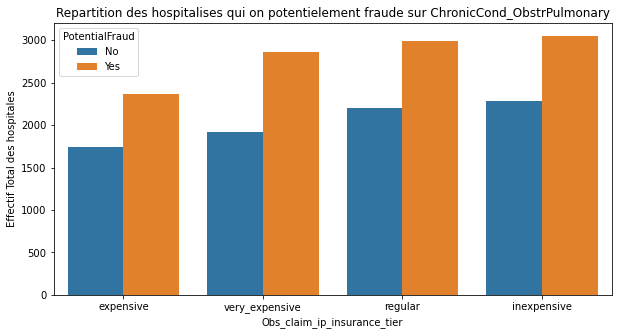

In [490]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Obs['Obs_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Obs)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_ObstrPulmonary")
plt.xlabel("Obs_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [491]:
df_inp_total['Obs_claim_ip_insurance_tier'] = df_inp_Obs['Obs_claim_ip_insurance_tier']
df_inp_total["Obs_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,3204,60,70,66,True,very_expensive,None,very_expensive,None,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,3204,60,70,66,True,regular,None,regular,None,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,3204,60,70,66,True,regular,None,regular,None,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1068,250,320,95,True,None,regular,regular,None,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2136,120,100,71,True,None,expensive,expensive,None,expensive


# Depression

In [492]:
df_inp_Dep = df_inp_total[df_inp_total['ChronicCond_Depression'] == 1]
df_inp_Dep.shape

(20327, 63)

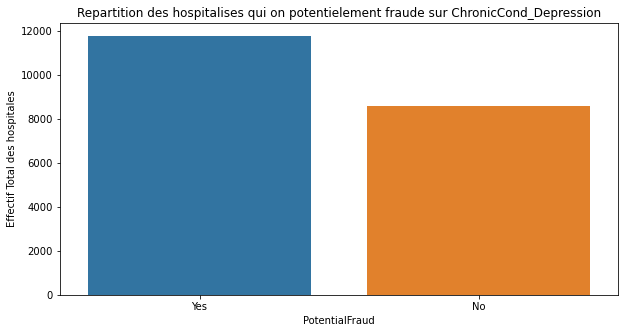

In [493]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Dep['PotentialFraud'],data = df_inp_Dep)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Depression")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [494]:
df_inp_Dep_not_fraud = df_inp_Dep[df_inp_Dep['PotentialFraud'] == "No"]

In [495]:
df_inp_Dep_not_fraud.shape

(8564, 63)

In [496]:
df_inp_Dep_not_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,3204,60,70,66,True,regular,None,regular,None,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,3204,60,70,66,True,regular,None,regular,None,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1068,250,320,95,True,None,regular,regular,None,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,2136,120,100,71,True,None,expensive,expensive,None,expensive
21,BENE11057,CLM38115,2009-02-12,2009-02-18,PRV51342,10000,PHY375861,None,None,2009-02-12,...,2136,200,50,76,True,None,expensive,expensive,None,expensive


In [497]:
df_inp_Dep_not_fraud.describe()

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.00000,8564.000000,8564.000000,...,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000
mean,9412.634283,5.712050,1.594465,1.253503,25.659505,402.059785,11.934960,11.93893,1.419780,1.225479,...,1.134400,1.110112,1.613148,1.585941,1.813171,18288.399113,2049.823213,1983.840495,568.827767,73.312237
std,9586.623964,5.453635,0.491024,0.703227,15.564136,270.165361,0.870231,0.79625,0.493552,0.417922,...,0.341101,0.313048,0.487058,0.492588,0.389797,17897.986618,1728.210272,3610.041923,881.074624,13.957808
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-10.000000,0.000000,26.000000
25%,4000.000000,2.000000,1.000000,1.000000,11.000000,170.000000,12.000000,12.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,6120.000000,1068.000000,300.000000,80.000000,67.000000
50%,7000.000000,4.000000,2.000000,1.000000,25.000000,400.000000,12.000000,12.00000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,13000.000000,2136.000000,930.000000,290.000000,75.000000
75%,11000.000000,7.000000,2.000000,1.000000,39.000000,600.000000,12.000000,12.00000,2.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,23615.000000,2136.000000,2300.000000,720.000000,83.000000
max,125000.000000,35.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.00000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,155270.000000,38272.000000,97510.000000,10800.000000,100.000000


In [498]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Dep_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_inp_Dep['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Dep['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Dep['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Dep['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Dep['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Dep['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Dep['Dep_claim_ip_insurance_tier'] = np.select(conditions, values)

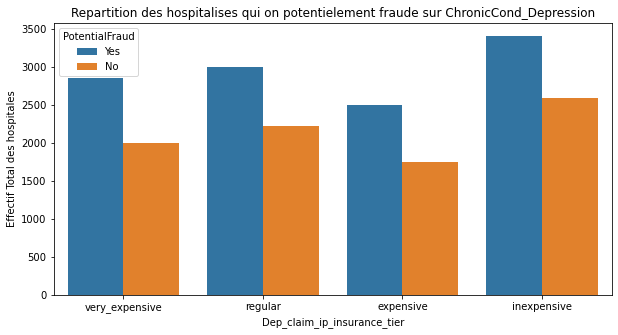

In [499]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Dep['Dep_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Dep)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Depression")
plt.xlabel("Dep_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [500]:
df_inp_total['Dep_claim_ip_insurance_tier'] = df_inp_Dep['Dep_claim_ip_insurance_tier']
df_inp_total["Dep_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,60,70,66,True,very_expensive,None,very_expensive,None,None,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,60,70,66,True,regular,None,regular,None,None,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,60,70,66,True,regular,None,regular,None,None,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,250,320,95,True,None,regular,regular,None,None,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,120,100,71,True,None,expensive,expensive,None,expensive,expensive


# Diabetes

In [501]:
df_inp_Dia = df_inp_total[df_inp_total['ChronicCond_Diabetes'] == 1]
df_inp_Dia.shape

(32462, 64)

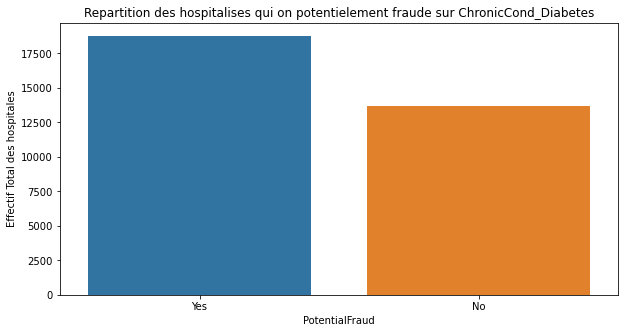

In [502]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Dia['PotentialFraud'],data = df_inp_Dia)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Diabetes")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [503]:
df_inp_Dia_not_fraud = df_inp_Dia[df_inp_Dia['PotentialFraud'] == "No"]

In [504]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Dia_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])
conditions = [
    (df_inp_Dia['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Dia['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Dia['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Dia['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Dia['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Dia['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Dia['Dia_claim_ip_insurance_tier'] = np.select(conditions, values)

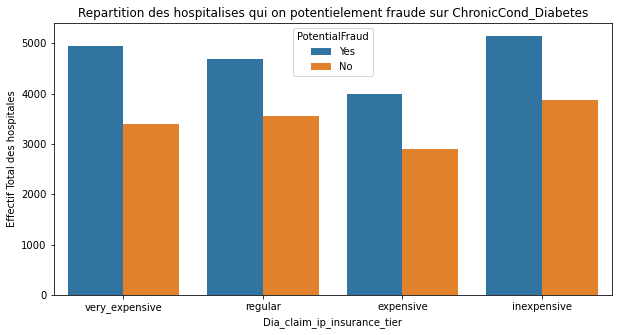

In [505]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Dia['Dia_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Dia)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Diabetes")
plt.xlabel("Dia_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [506]:
df_inp_total['Dia_claim_ip_insurance_tier'] = df_inp_Dia['Dia_claim_ip_insurance_tier']
df_inp_total["Dia_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,OPAnnualDeductibleAmt,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,70,66,True,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,70,66,True,regular,None,regular,None,None,regular,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,70,66,True,regular,None,regular,None,None,regular,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,320,95,True,None,regular,regular,None,None,regular,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,100,71,True,None,expensive,expensive,None,expensive,expensive,None


# Ischemic Heart

In [507]:
df_inp_Isc = df_inp_total[df_inp_total['ChronicCond_IschemicHeart'] == 1]
df_inp_Isc.shape

(34674, 65)

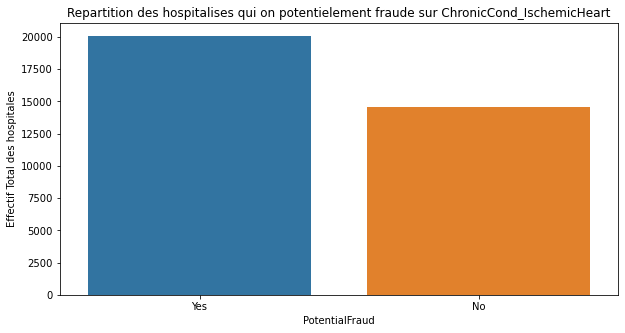

In [508]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Isc['PotentialFraud'],data = df_inp_Isc)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_IschemicHeart")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [509]:
df_inp_Isc_not_fraud = df_inp_Isc[df_inp_Isc['PotentialFraud'] == "No"]

In [510]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Isc_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])
conditions = [
    (df_inp_Isc['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Isc['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Isc['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Isc['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Isc['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Isc['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Isc['Isc_claim_ip_insurance_tier'] = np.select(conditions, values)

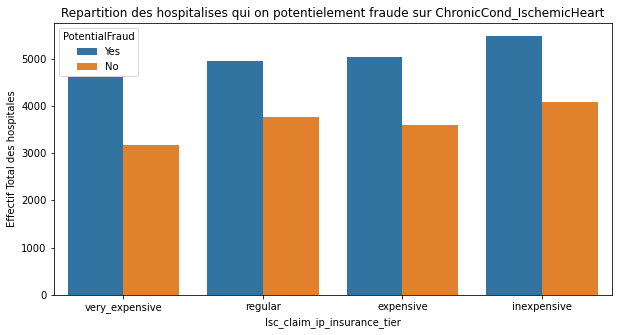

In [511]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Isc['Isc_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Isc)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_IschemicHeart")
plt.xlabel("Isc_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [512]:
df_inp_total['Isc_claim_ip_insurance_tier'] = df_inp_Isc['Isc_claim_ip_insurance_tier']
df_inp_total["Isc_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Age,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,66,True,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,66,True,regular,None,regular,None,None,regular,regular,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,66,True,regular,None,regular,None,None,regular,regular,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,95,True,None,regular,regular,None,None,regular,regular,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,71,True,None,expensive,expensive,None,expensive,expensive,None,expensive


# Osteoporasis

In [513]:
df_inp_Ost = df_inp_total[df_inp_total['ChronicCond_Osteoporasis'] == 1]
df_inp_Ost.shape

(14229, 66)

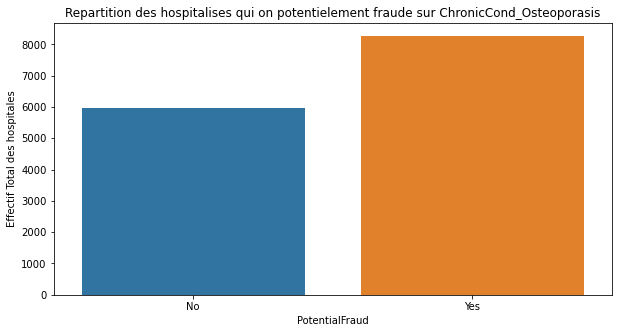

In [514]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Ost['PotentialFraud'],data = df_inp_Ost)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Osteoporasis")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [515]:
df_inp_Ost_not_fraud = df_inp_Ost[df_inp_Ost['PotentialFraud'] == "No"]

In [516]:
conditions = [
    (df_inp_Ost['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Ost['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Ost['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Ost['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Ost['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Ost['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Ost['Ost_claim_ip_insurance_tier'] = np.select(conditions, values)

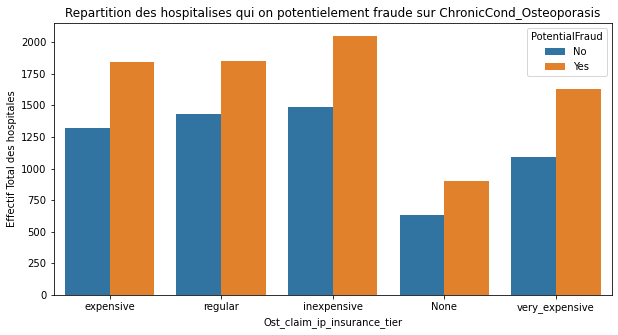

In [517]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Ost['Isc_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Ost)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Osteoporasis")
plt.xlabel("Ost_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [518]:
df_inp_total['Ost_claim_ip_insurance_tier'] = df_inp_Ost['Ost_claim_ip_insurance_tier']
df_inp_total['Ost_claim_ip_insurance_tier'].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,benonreclam,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier,Ost_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,True,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive,None
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,True,regular,None,regular,None,None,regular,regular,regular,None
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,True,regular,None,regular,None,None,regular,regular,regular,None
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,True,None,regular,regular,None,None,regular,regular,None,None
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,True,None,expensive,expensive,None,expensive,expensive,None,expensive,None


# Rheumatoidarthritis

In [519]:
df_inp_Rhe = df_inp_total[df_inp_total['ChronicCond_rheumatoidarthritis'] == 1]
df_inp_Rhe.shape

(14585, 67)

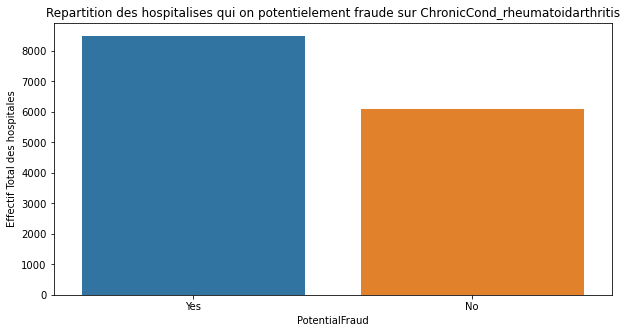

In [520]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Rhe['PotentialFraud'],data = df_inp_Rhe)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_rheumatoidarthritis")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [521]:
df_inp_Rhe_not_fraud = df_inp_Rhe[df_inp_Rhe['PotentialFraud'] == "No"]

In [522]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Rhe_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_inp_Rhe['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Rhe['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Rhe['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Rhe['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Rhe['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Rhe['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['very_expensive', 'expensive', 'regular', 'inexpensive']
df_inp_Rhe['Rhe_claim_ip_insurance_tier'] = np.select(conditions, values)

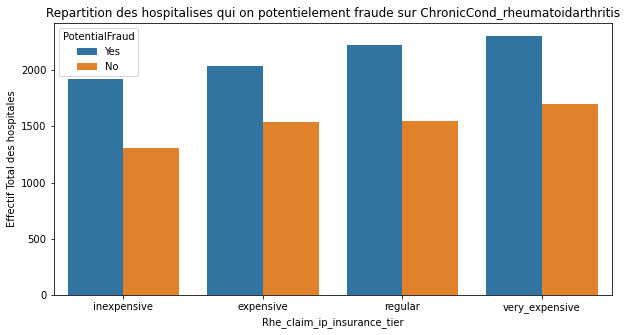

In [523]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Rhe['Rhe_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Rhe)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_rheumatoidarthritis")
plt.xlabel("Rhe_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [524]:
df_inp_total['Rhe_claim_ip_insurance_tier'] = df_inp_Rhe['Rhe_claim_ip_insurance_tier']
df_inp_total["Rhe_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Alz_claim_ip_insurance_tier,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier,Ost_claim_ip_insurance_tier,Rhe_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,very_expensive,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive,None,inexpensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,regular,None,regular,None,None,regular,regular,regular,None,expensive
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,regular,None,regular,None,None,regular,regular,regular,None,expensive
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,None,regular,regular,None,None,regular,regular,None,None,expensive
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,None,expensive,expensive,None,expensive,expensive,None,expensive,None,None


# Stroke

In [525]:
df_inp_Str = df_inp_total[df_inp_total['ChronicCond_Depression'] == 1]
df_inp_Str.shape

(20327, 68)

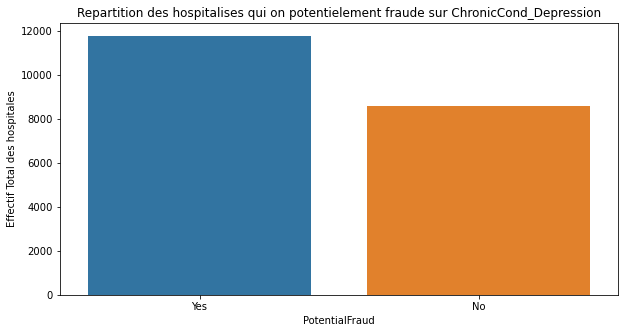

In [526]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_inp_Str['PotentialFraud'],data = df_inp_Str)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Depression")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [527]:
df_inp_Str_not_fraud = df_inp_Str[df_inp_Str['PotentialFraud'] == "No"]

In [528]:
lower_quantile, middle_quantile,upper_quantile = df_inp_Str_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_inp_Str['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_inp_Str['InscClaimAmtReimbursed'] > lower_quantile) & (df_inp_Str['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_inp_Str['InscClaimAmtReimbursed'] > middle_quantile) & (df_inp_Str['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_inp_Str['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_inp_Str['Str_claim_ip_insurance_tier'] = np.select(conditions, values)

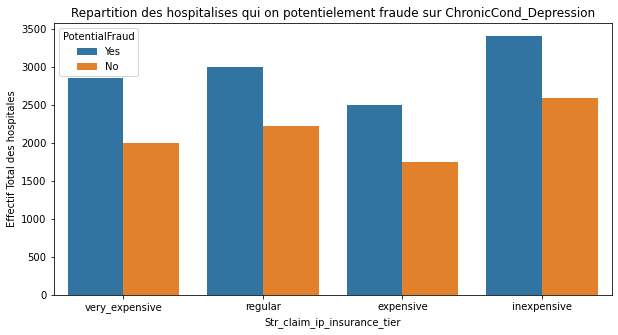

In [529]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_inp_Str['Str_claim_ip_insurance_tier'], hue= 'PotentialFraud', data = df_inp_Str)
plt.title("Repartition des hospitalises qui on potentielement fraude sur ChronicCond_Depression")
plt.xlabel("Str_claim_ip_insurance_tier")
plt.ylabel('Effectif Total des hospitales')
plt.show()

In [530]:
df_inp_total['Str_claim_ip_insurance_tier'] = df_inp_Str['Str_claim_ip_insurance_tier']
df_inp_total["Str_claim_ip_insurance_tier"].fillna("None", inplace = True)
df_inp_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,Hf_claim_ip_insurance_tier,Kd_claim_insurance_tier,Ca_claim_ip_insurance_tier,Obs_claim_ip_insurance_tier,Dep_claim_ip_insurance_tier,Dia_claim_ip_insurance_tier,Isc_claim_ip_insurance_tier,Ost_claim_ip_insurance_tier,Rhe_claim_ip_insurance_tier,Str_claim_ip_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,2009-04-12,...,None,very_expensive,None,None,very_expensive,very_expensive,very_expensive,None,inexpensive,very_expensive
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,2009-08-31,...,None,regular,None,None,regular,regular,regular,None,expensive,regular
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,2009-09-17,...,None,regular,None,None,regular,regular,regular,None,expensive,regular
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,regular,regular,None,None,regular,regular,None,None,expensive,regular
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,2009-08-13,...,expensive,expensive,None,expensive,expensive,None,expensive,None,None,expensive


# Outpatient Data

In [531]:
df_out = pd.read_csv('Train_Outpatientdata.csv')
df_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [532]:
df_out.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [533]:
df_out.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [534]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [535]:
df_out.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


In [536]:
df_out.shape

(517737, 27)

In [537]:
df_out['AttendingPhysician'] = df_out['AttendingPhysician'].fillna("None")
df_out['OperatingPhysician'] = df_out['OperatingPhysician'].fillna("None")
df_out['OtherPhysician'] = df_out['OtherPhysician'].fillna("None")
df_out=df_out.fillna(0)

In [538]:
df_out['BeneID'].nunique()

133980

# BENEFICIAIRES DES RECLAMATIONS

In [539]:
df_out['BeneID'].value_counts()

BENE42721     29
BENE118316    29
BENE143400    27
BENE63544     27
BENE63504     27
              ..
BENE89590      1
BENE89592      1
BENE89594      1
BENE89595      1
BENE85121      1
Name: BeneID, Length: 133980, dtype: int64

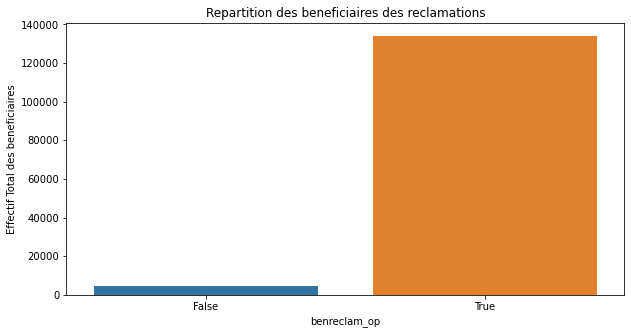

In [540]:
df_ben["benreclam_op"] = df_ben["BeneID"].isin(df_out["BeneID"])
plt.figure(figsize = (10,5))
sns.countplot('benreclam_op',data = df_ben)
plt.title("Repartition des beneficiaires des reclamations")
plt.xlabel("benreclam_op")
plt.ylabel('Effectif Total des beneficiaires')
plt.show()

In [541]:
# ajoutons une colonne duree de reclamation
df_out['ClaimEndDt'] = pd.to_datetime(df_out['ClaimEndDt'], format='%Y-%m-%d')
df_out['ClaimStartDt'] = pd.to_datetime(df_out['ClaimStartDt'], format='%Y-%m-%d')
df_out["claim_duration"] = df_out['ClaimEndDt'] - df_out['ClaimStartDt']
df_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,claim_duration
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,56409,0 days
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,79380,0 days
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,71947,0 days


# FUSIONNER OUTPATIENT  DATA AVEC PROVIDER DATA

In [542]:
df_out_total = df_out.join(df_prov.set_index('Provider'), on='Provider')
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,claim_duration,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0.0,0.0,0.0,0.0,0.0,0.0,0,56409,0 days,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0.0,0.0,0.0,0.0,0.0,0.0,0,79380,0 days,No
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days,No
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0 days,Yes
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0.0,0.0,0.0,0.0,0.0,0.0,0,71947,0 days,Yes


In [543]:
df_out_total.dtypes

BeneID                             object
ClaimID                            object
ClaimStartDt               datetime64[ns]
ClaimEndDt                 datetime64[ns]
Provider                           object
InscClaimAmtReimbursed              int64
AttendingPhysician                 object
OperatingPhysician                 object
OtherPhysician                     object
ClmDiagnosisCode_1                 object
ClmDiagnosisCode_2                 object
ClmDiagnosisCode_3                 object
ClmDiagnosisCode_4                 object
ClmDiagnosisCode_5                 object
ClmDiagnosisCode_6                 object
ClmDiagnosisCode_7                 object
ClmDiagnosisCode_8                 object
ClmDiagnosisCode_9                 object
ClmDiagnosisCode_10                object
ClmProcedureCode_1                float64
ClmProcedureCode_2                float64
ClmProcedureCode_3                float64
ClmProcedureCode_4                float64
ClmProcedureCode_5                

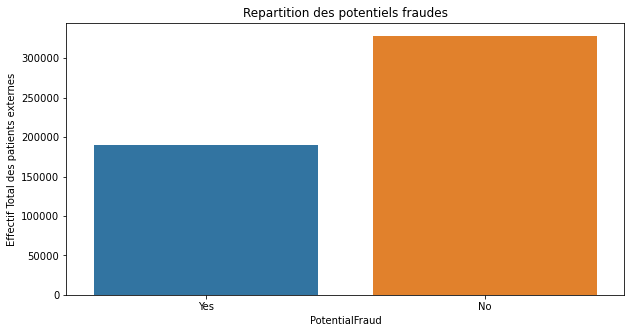

In [544]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_total)
plt.title("Repartition des potentiels fraudes")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [545]:
#ajoutons  des données sur les données bénéficiaires sur la demande
df_out_total = df_out_total.join(df_ben.set_index('BeneID'), on='BeneID')
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,benreclam_op
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,2,2,2,0,0,30,50,73,True,True
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,2,2,2,0,0,90,40,73,True,True
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,2,2,2,0,0,90,40,73,True,True
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,1,1,2,0,0,1810,760,87,True,True
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,1,1,2,0,0,1810,760,87,True,True


# Disease

# Alzheimer

In [546]:
df_out_Alz = df_out_total[df_out_total['ChronicCond_Alzheimer'] == 1]
df_out_Alz.shape

(203926, 56)

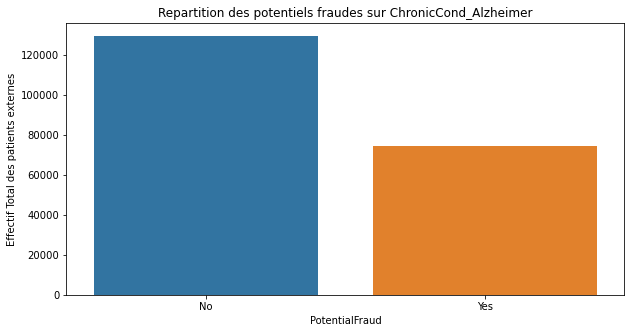

In [547]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Alz)
plt.title("Repartition des potentiels fraudes sur ChronicCond_Alzheimer")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [548]:
df_out_Alz_not_fraud = df_out_Alz[df_out_Alz['PotentialFraud'] == "No"]
lower_quantile, middle_quantile,upper_quantile = df_out_Alz_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])
conditions = [
    (df_out_Alz['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Alz['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Alz['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Alz['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Alz['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Alz['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Alz['Alz_claim_op_insurance_tier'] = np.select(conditions, values)

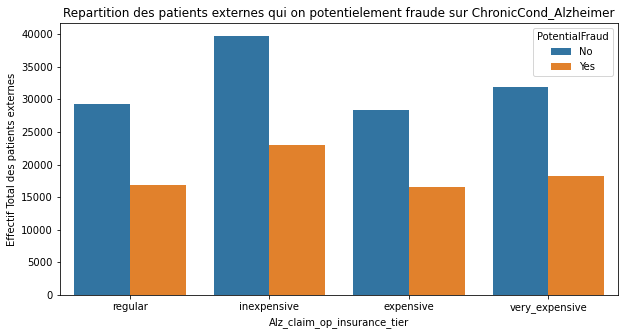

In [549]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Alz['Alz_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Alz)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_Alzheimer")
plt.xlabel("Alz_claim_op_insurance_tier")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [550]:
df_out_total['Alz_claim_op_insurance_tier'] = df_out_Alz['Alz_claim_op_insurance_tier']
df_out_total["Alz_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,benreclam_op,Alz_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,2,2,0,0,30,50,73,True,True,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,2,2,0,0,90,40,73,True,True,regular
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,2,2,0,0,90,40,73,True,True,inexpensive
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,1,2,0,0,1810,760,87,True,True,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,1,2,0,0,1810,760,87,True,True,expensive


# Heartfailure

In [551]:
df_out_Hf = df_out_total[df_out_total['ChronicCond_Heartfailure'] == 1]
df_out_Hf.shape

(300368, 57)

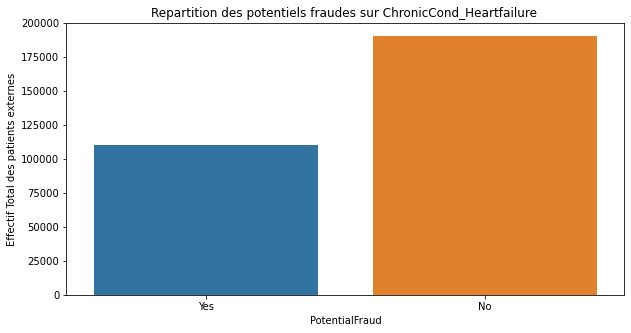

In [552]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Hf)
plt.title("Repartition des potentiels fraudes sur ChronicCond_Heartfailure ")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [553]:
df_out_Hf_not_fraud = df_out_Hf[df_out_Hf['PotentialFraud'] == "No"]

In [554]:
lower_quantile, middle_quantile,upper_quantile = df_out_Hf_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Hf['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Hf['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Hf['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Hf['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Hf['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Hf['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Hf['Hf_claim_op_insurance_tier'] = np.select(conditions, values)

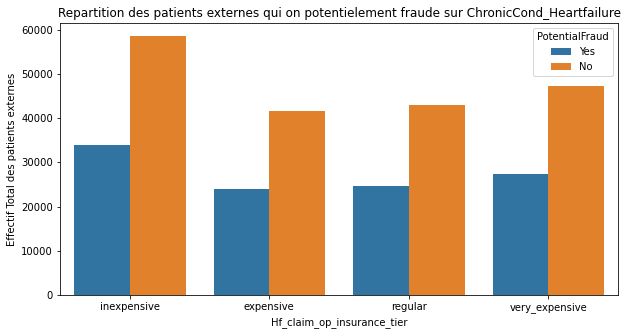

In [555]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Hf['Hf_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Hf)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_Heartfailure")
plt.xlabel("Hf_claim_op_insurance_tier")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [556]:
df_out_total['Hf_claim_op_insurance_tier'] = df_out_Hf['Hf_claim_op_insurance_tier']
df_out_total["Hf_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,2,0,0,30,50,73,True,True,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,2,0,0,90,40,73,True,True,regular,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,2,0,0,90,40,73,True,True,inexpensive,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,2,0,0,1810,760,87,True,True,inexpensive,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,2,0,0,1810,760,87,True,True,expensive,expensive


# Kidney Disease

In [557]:
df_out_Kd = df_out_total[df_out_total['ChronicCond_KidneyDisease'] == 1]
df_out_Kd.shape

(205628, 58)

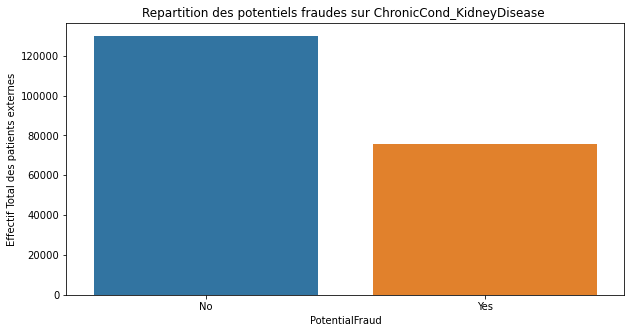

In [558]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Kd)
plt.title("Repartition des potentiels fraudes sur ChronicCond_KidneyDisease ")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [559]:
df_out_Kd_not_fraud = df_out_Kd[df_out_Kd['PotentialFraud'] == "No"]

In [560]:
lower_quantile, middle_quantile,upper_quantile = df_out_Kd_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Kd['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Kd['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Kd['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Kd['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Kd['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Kd['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Kd['Kd_claim_op_insurance_tier'] = np.select(conditions, values)

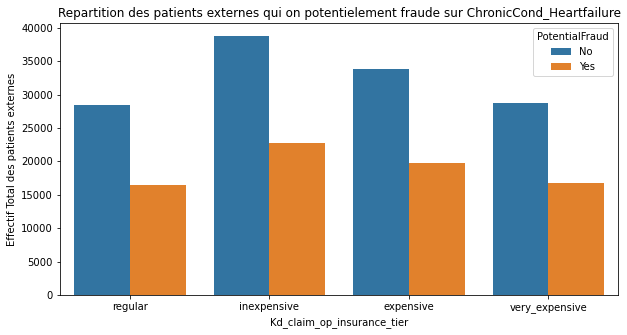

In [561]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Kd['Kd_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Kd)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_Heartfailure")
plt.xlabel("Kd_claim_op_insurance_tier")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [562]:
df_out_total['Kd_claim_op_insurance_tier'] = df_out_Kd['Kd_claim_op_insurance_tier']
df_out_total["Kd_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,0,30,50,73,True,True,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,0,90,40,73,True,True,regular,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,0,90,40,73,True,True,inexpensive,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,0,1810,760,87,True,True,inexpensive,inexpensive,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,0,1810,760,87,True,True,expensive,expensive,None


# Cancer

In [563]:
df_out_Ca = df_out_total[df_out_total['ChronicCond_Cancer'] == 1]
df_out_Ca.shape

(76776, 59)

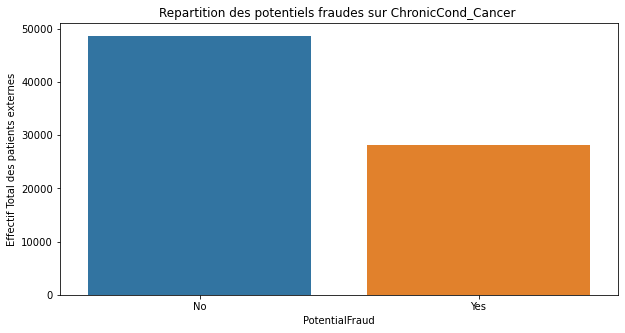

In [564]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Ca)
plt.title("Repartition des potentiels fraudes sur ChronicCond_Cancer ")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [565]:
df_out_Ca_not_fraud = df_out_Ca[df_out_Ca['PotentialFraud'] == "No"]

In [566]:
lower_quantile, middle_quantile,upper_quantile = df_out_Ca_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Ca['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Ca['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Ca['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Ca['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Ca['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Ca['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Ca['Ca_claim_op_insurance_tier'] = np.select(conditions, values)

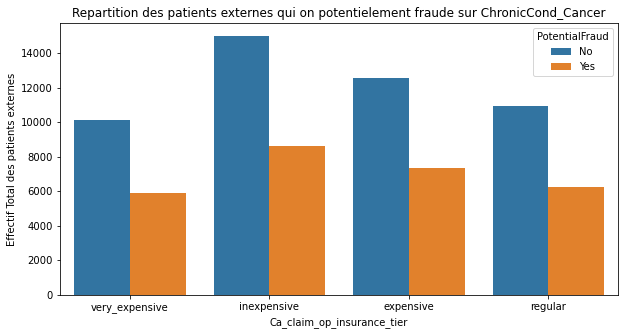

In [567]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Ca['Ca_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Ca)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_Cancer")
plt.xlabel("Ca_claim_op_insurance_tier")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [568]:
df_out_total['Ca_claim_op_insurance_tier'] = df_out_Ca['Ca_claim_op_insurance_tier']
df_out_total["Ca_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,0,30,50,73,True,True,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,0,90,40,73,True,True,regular,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,0,90,40,73,True,True,inexpensive,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,0,1810,760,87,True,True,inexpensive,inexpensive,None,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,0,1810,760,87,True,True,expensive,expensive,None,None


# ObstrPulmonary

In [569]:
df_out_Obs = df_out_total[df_out_total['ChronicCond_ObstrPulmonary'] == 1]
df_out_Obs.shape

(155288, 60)

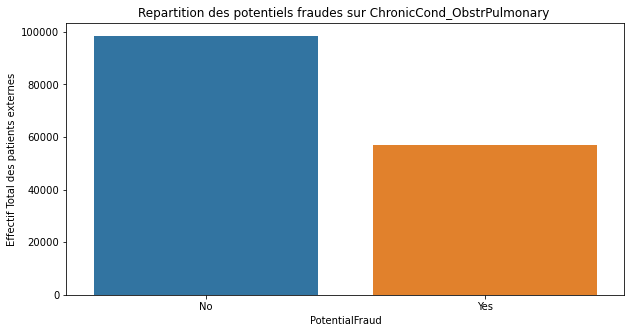

In [570]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Obs)
plt.title("Repartition des potentiels fraudes sur ChronicCond_ObstrPulmonary ")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [571]:
df_out_Obs_not_fraud = df_out_Obs[df_out_Obs['PotentialFraud'] == "No"]

lower_quantile, middle_quantile,upper_quantile = df_out_Obs_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Obs['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Obs['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Obs['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Obs['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Obs['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Obs['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Obs['Obs_claim_op_insurance_tier'] = np.select(conditions, values)

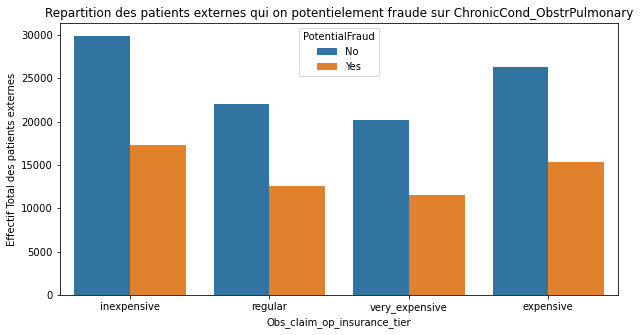

In [572]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Obs['Obs_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Obs)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_ObstrPulmonary")
plt.xlabel('Obs_claim_op_insurance_tier')
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [573]:
df_out_total['Obs_claim_op_insurance_tier'] = df_out_Obs['Obs_claim_op_insurance_tier']
df_out_total["Obs_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,benonreclam,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,30,50,73,True,True,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,90,40,73,True,True,regular,None,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,90,40,73,True,True,inexpensive,None,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,1810,760,87,True,True,inexpensive,inexpensive,None,None,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,1810,760,87,True,True,expensive,expensive,None,None,None


# Depression

In [574]:
df_out_Dep = df_out_total[df_out_total['ChronicCond_Depression'] == 1]
df_out_Dep.shape

(222387, 61)

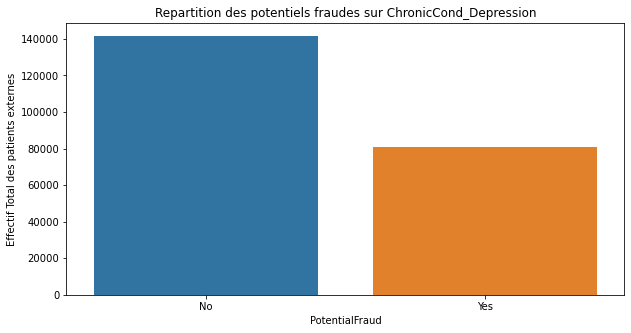

In [575]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Dep)
plt.title("Repartition des potentiels fraudes sur ChronicCond_Depression")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [576]:
df_out_Dep_not_fraud = df_out_Dep[df_out_Dep['PotentialFraud'] == "No"]

In [577]:
lower_quantile, middle_quantile,upper_quantile = df_out_Dep_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Dep['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Dep['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Dep['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Dep['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Dep['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Dep['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Dep['Dep_claim_op_insurance_tier'] = np.select(conditions, values)


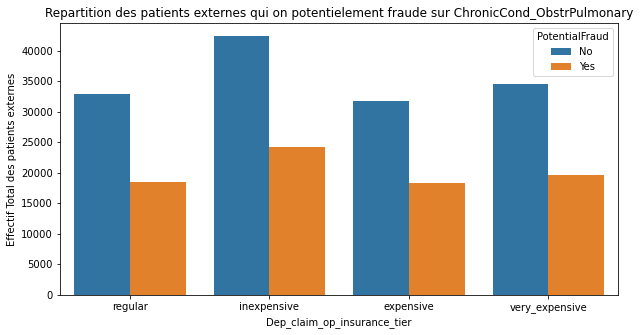

In [578]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Dep['Dep_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Dep)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_ObstrPulmonary")
plt.xlabel('Dep_claim_op_insurance_tier')
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [579]:
df_out_total['Dep_claim_op_insurance_tier'] = df_out_Dep['Dep_claim_op_insurance_tier']
df_out_total["Dep_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,OPAnnualDeductibleAmt,Age,benonreclam,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,50,73,True,True,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,40,73,True,True,regular,None,None,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,40,73,True,True,inexpensive,None,None,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,760,87,True,True,inexpensive,inexpensive,None,None,None,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,760,87,True,True,expensive,expensive,None,None,None,None


# Diabetes

In [580]:
df_out_Dia = df_out_total[df_out_total['ChronicCond_Diabetes'] == 1]
df_out_Dia.shape

(361297, 62)

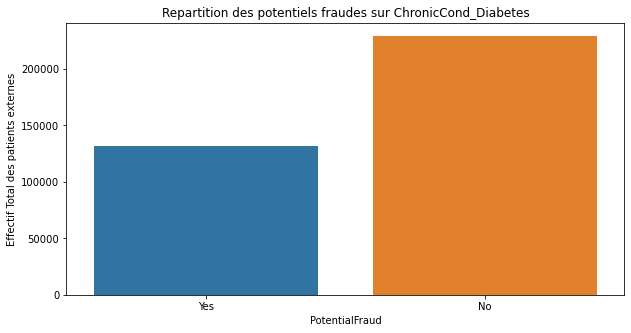

In [581]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Dia)
plt.title("Repartition des potentiels fraudes sur ChronicCond_Diabetes")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [582]:
df_out_Dia_not_fraud = df_out_Dia[df_out_Dia['PotentialFraud'] == "No"]

lower_quantile, middle_quantile,upper_quantile = df_out_Dia_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Dia['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Dia['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Dia['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Dia['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Dia['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Dia['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Dia['Dia_claim_op_insurance_tier'] = np.select(conditions, values)

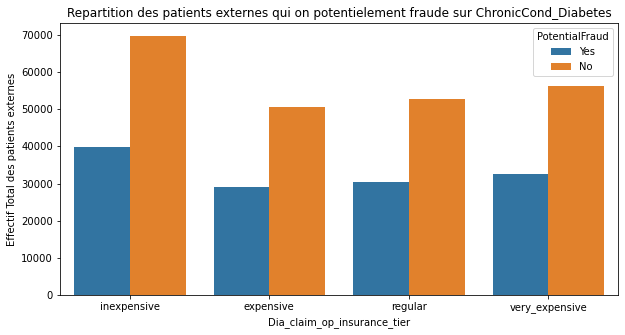

In [583]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Dia['Dia_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Dia)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_Diabetes")
plt.xlabel('Dia_claim_op_insurance_tier')
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [584]:
df_out_total['Dia_claim_op_insurance_tier'] = df_out_Dia['Dia_claim_op_insurance_tier']
df_out_total["Dia_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,Age,benonreclam,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,73,True,True,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,73,True,True,regular,None,None,None,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,73,True,True,inexpensive,None,None,None,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,87,True,True,inexpensive,inexpensive,None,None,None,None,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,87,True,True,expensive,expensive,None,None,None,None,expensive


# IschemicHeart

In [585]:
df_out_Isc = df_out_total[df_out_total['ChronicCond_IschemicHeart'] == 1]
df_out_Isc.shape

(389156, 63)

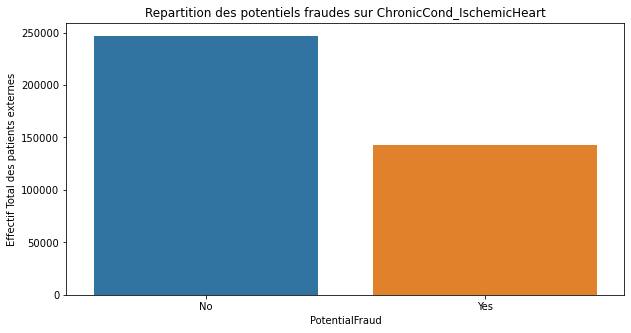

In [586]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Isc)
plt.title("Repartition des potentiels fraudes sur ChronicCond_IschemicHeart")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [587]:
df_out_Isc_not_fraud = df_out_Isc[df_out_Isc['PotentialFraud'] == "No"]

In [588]:
lower_quantile, middle_quantile,upper_quantile = df_out_Isc_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [589]:
conditions = [
    (df_out_Isc['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Isc['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Isc['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Isc['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Isc['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Isc['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Isc['Isc_claim_op_insurance_tier'] = np.select(conditions, values)

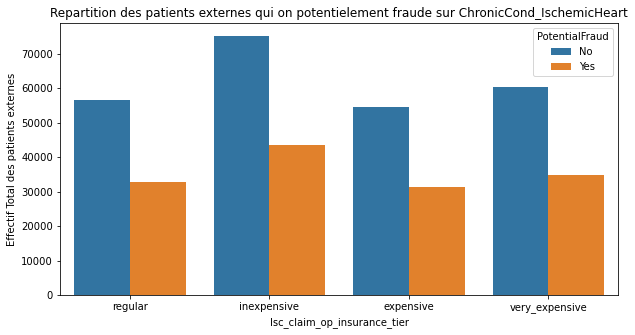

In [590]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Isc['Isc_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Isc)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_IschemicHeart")
plt.xlabel('Isc_claim_op_insurance_tier')
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [591]:
df_out_total['Isc_claim_op_insurance_tier'] = df_out_Isc['Isc_claim_op_insurance_tier']
df_out_total["Isc_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,benonreclam,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,True,True,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,True,True,regular,None,None,None,None,None,None,regular
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,True,True,inexpensive,None,None,None,None,None,None,inexpensive
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,True,True,inexpensive,inexpensive,None,None,None,None,inexpensive,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,True,True,expensive,expensive,None,None,None,None,expensive,expensive


# Osteoporasis

In [592]:
df_out_Ost = df_out_total[df_out_total['ChronicCond_Osteoporasis'] == 1]
df_out_Ost.shape

(163085, 64)

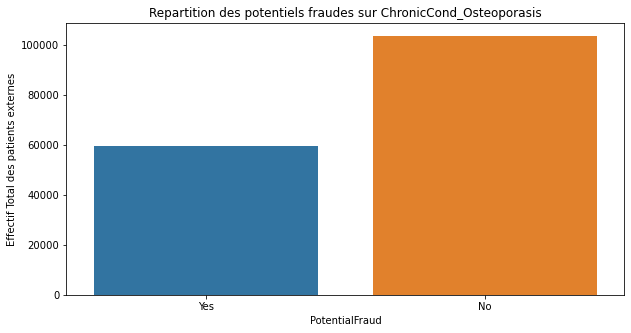

In [593]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Ost)
plt.title("Repartition des potentiels fraudes sur ChronicCond_Osteoporasis")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [594]:
df_out_Ost_not_fraud = df_out_Ost[df_out_Ost['PotentialFraud'] == "No"]

In [595]:
lower_quantile, middle_quantile,upper_quantile = df_out_Ost_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Ost['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Ost['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Ost['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Ost['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Ost['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Ost['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Ost['Ost_claim_op_insurance_tier'] = np.select(conditions, values)

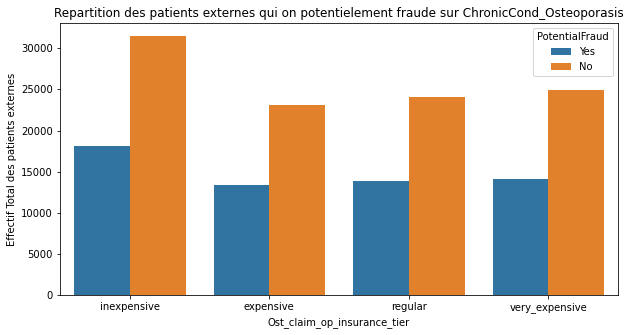

In [596]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Ost['Ost_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Ost)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_Osteoporasis")
plt.xlabel('Ost_claim_op_insurance_tier')
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [597]:
df_out_total['Ost_claim_op_insurance_tier'] = df_out_Ost['Ost_claim_op_insurance_tier']
df_out_total["Ost_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,benreclam_op,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,True,None,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,True,regular,None,None,None,None,None,None,regular,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,True,inexpensive,None,None,None,None,None,None,inexpensive,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,True,inexpensive,inexpensive,None,None,None,None,inexpensive,inexpensive,inexpensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,True,expensive,expensive,None,None,None,None,expensive,expensive,expensive


# Rheumatoidarthritis

In [598]:
df_out_Rhe = df_out_total[df_out_total['ChronicCond_rheumatoidarthritis'] == 1]
df_out_Rhe.shape

(159114, 65)

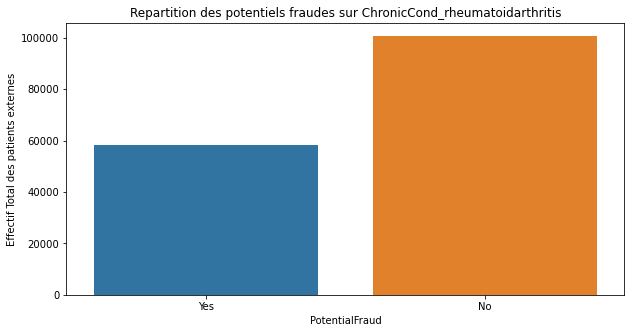

In [599]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Rhe)
plt.title("Repartition des potentiels fraudes sur ChronicCond_rheumatoidarthritis")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [600]:
df_out_Rhe_not_fraud = df_out_Rhe[df_out_Rhe['PotentialFraud'] == "No"]

In [601]:
lower_quantile, middle_quantile,upper_quantile = df_out_Rhe_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

conditions = [
    (df_out_Rhe['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Rhe['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Rhe['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Rhe['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Rhe['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Rhe['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['very_expensive', 'expensive', 'regular', 'inexpensive']
df_out_Rhe['Rhe_claim_op_insurance_tier'] = np.select(conditions, values)

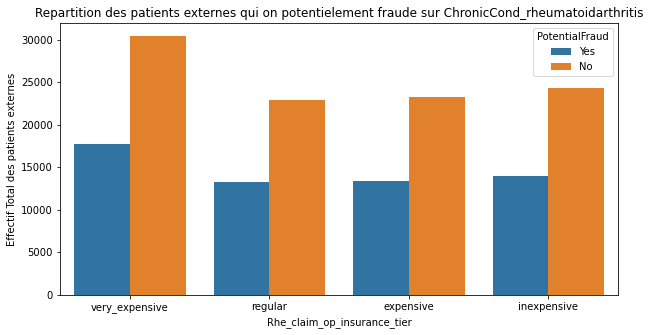

In [602]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Rhe['Rhe_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Rhe)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_rheumatoidarthritis")
plt.xlabel('Rhe_claim_op_insurance_tier')
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [603]:
df_out_total['Rhe_claim_op_insurance_tier'] = df_out_Rhe['Rhe_claim_op_insurance_tier']
df_out_total["Rhe_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,Alz_claim_op_insurance_tier,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,None,None,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,regular,None,None,None,None,None,None,regular,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,inexpensive,None,None,None,None,None,None,inexpensive,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,inexpensive,inexpensive,None,None,None,None,inexpensive,inexpensive,inexpensive,very_expensive
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,expensive,expensive,None,None,None,None,expensive,expensive,expensive,regular


# Stroke

In [604]:
df_out_Str = df_out_total[df_out_total['ChronicCond_Depression'] == 1]
df_out_Str.shape

(222387, 66)

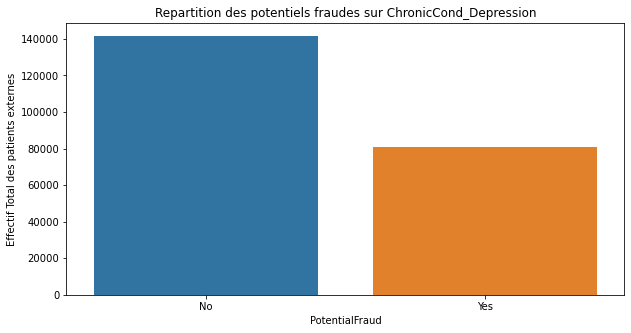

In [605]:
plt.figure(figsize = (10,5))
sns.countplot('PotentialFraud',data = df_out_Str)
plt.title("Repartition des potentiels fraudes sur ChronicCond_Depression")
plt.xlabel("PotentialFraud")
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [606]:
df_out_Str_not_fraud = df_out_Str[df_out_Str['PotentialFraud'] == "No"]

In [607]:
lower_quantile, middle_quantile,upper_quantile = df_out_Str_not_fraud.InscClaimAmtReimbursed.quantile([0.25,0.5,0.75])

In [608]:
conditions = [
    (df_out_Str['InscClaimAmtReimbursed'] <= lower_quantile),
    (df_out_Str['InscClaimAmtReimbursed'] > lower_quantile) & (df_out_Str['InscClaimAmtReimbursed'] <= middle_quantile),
    (df_out_Str['InscClaimAmtReimbursed'] > middle_quantile) & (df_out_Str['InscClaimAmtReimbursed'] <= upper_quantile),
    (df_out_Str['InscClaimAmtReimbursed'] > upper_quantile)
    ]

values = ['inexpensive','regular','expensive' ,'very_expensive']
df_out_Str['Str_claim_op_insurance_tier'] = np.select(conditions, values)

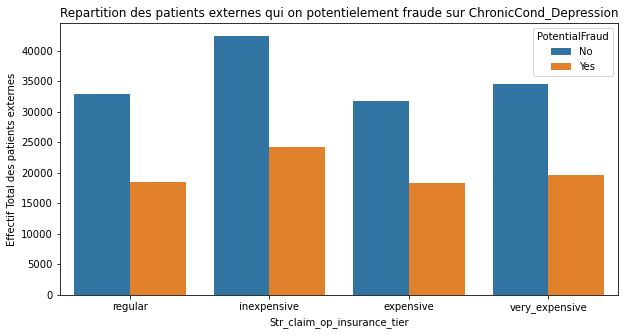

In [609]:
plt.figure(figsize = (10,5))
sns.countplot(x  = df_out_Str['Str_claim_op_insurance_tier'], hue= 'PotentialFraud', data = df_out_Str)
plt.title("Repartition des patients externes qui on potentielement fraude sur ChronicCond_Depression")
plt.xlabel('Str_claim_op_insurance_tier')
plt.ylabel('Effectif Total des patients externes')
plt.show()

In [610]:
df_out_total['Str_claim_op_insurance_tier'] = df_out_Str['Str_claim_op_insurance_tier']
df_out_total["Str_claim_op_insurance_tier"].fillna("None", inplace = True)
df_out_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,None,None,78943,...,None,None,None,None,None,None,None,None,None,None
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,None,None,6115,...,None,None,None,None,None,None,regular,None,None,None
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,None,None,2723,...,None,None,None,None,None,None,inexpensive,None,None,None
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,None,None,71988,...,inexpensive,None,None,None,None,inexpensive,inexpensive,inexpensive,very_expensive,None
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,None,None,82382,...,expensive,None,None,None,None,expensive,expensive,expensive,regular,None


# Concat Two Dataframe

In [611]:
frames = [df_inp_total, df_out_total]
df_train_total = pd.concat(frames)

In [612]:
df_train_total = df_train_total.drop('AdmissionDt', axis=1)

In [618]:
df_train_total = df_train_total.fillna(method='ffill')

In [619]:
df_train_total_cpy = df_train_total.copy()

# Vérifiez les répétitions entre les fraudes des fournisseurs  avec les médecins traitants

In [620]:
df_train_total_fraud = df_train_total[df_train_total['PotentialFraud'] == "Yes"]

In [621]:
df_train_total_fraud['AttendingPhysician'].replace(to_replace=["None"], value=np.nan, inplace=True)

In [622]:
df_train_total_fraud.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,1749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,None,78605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,None,41401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,BENE11034,CLM57949,2009-07-01,2009-07-09,PRV55193,102000,PHY397979,PHY418257,None,78605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [623]:
df_train_total_fraud= df_train_total_fraud.groupby(['AttendingPhysician', 'Provider']).size().reset_index(name='counts')

In [624]:
df_train_total_fraud.counts

0         1
1         2
2        17
3         1
4         1
         ..
20799     1
20800     9
20801     3
20802     1
20803     3
Name: counts, Length: 20804, dtype: int64

In [625]:
df_train_total_fraud.head()

,AttendingPhysician,Provider,counts
0,PHY311002,PRV57495,1
1,PHY311008,PRV51868,2
2,PHY311011,PRV55689,17
3,PHY311017,PRV52045,1
4,PHY311021,PRV56259,1


In [626]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Physician_Potential_Fraud'] = np.select(conditions, values)

In [627]:
df_train_total_fraud

,AttendingPhysician,Provider,counts,Physician_Potential_Fraud
0,PHY311002,PRV57495,1,normal
1,PHY311008,PRV51868,2,suspicious
2,PHY311011,PRV55689,17,most_probably_fraud
3,PHY311017,PRV52045,1,normal
4,PHY311021,PRV56259,1,normal
...,...,...,...,...
20799,PHY434128,PRV51149,1,normal
20800,PHY434140,PRV54739,9,most_probably_fraud
20801,PHY434142,PRV54566,3,very_suspicious
20802,PHY434153,PRV51951,1,normal


In [628]:
df_train_total.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Hf_claim_op_insurance_tier,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [629]:
df_train_total_cpy['Physician_Potential_Fraud'] = df_train_total_fraud['Physician_Potential_Fraud']
df_train_total_cpy["Physician_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suspicious
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,most_probably_fraud
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal


# Bénéficiaires avec un niveau de remboursement relatif

# IPAnnualReimbursementAmt

In [630]:
max_Ip_annual_reimbursement = df_train_total_cpy[df_train_total_cpy.IPAnnualReimbursementAmt == df_train_total_cpy.IPAnnualReimbursementAmt.max()]

In [631]:
max_Ip_annual_reimbursement

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
39514,BENE155688,CLM44467,2009-03-28,2009-04-03,PRV53461,125000,PHY332723,PHY332723,None,4280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
39515,BENE155688,CLM64374,2009-08-18,2009-08-19,PRV53401,34000,PHY361076,PHY420479,None,72283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,...,very_expensive,None,None,None,very_expensive,very_expensive,None,None,None,None


In [632]:
max_Ip_annual_reimbursement['PotentialFraud']

39514     Yes
39515     Yes
505756    Yes
Name: PotentialFraud, dtype: object

In [633]:
df_bene_fraud = df_train_total_cpy[df_train_total_cpy.BeneID == 'BENE155688']
df_bene_fraud

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
39514,BENE155688,CLM44467,2009-03-28,2009-04-03,PRV53461,125000,PHY332723,PHY332723,None,4280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
39515,BENE155688,CLM64374,2009-08-18,2009-08-19,PRV53401,34000,PHY361076,PHY420479,None,72283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,...,very_expensive,None,None,None,very_expensive,very_expensive,None,None,None,None


# OPAnnualReimbursementAmt

In [634]:
max_Op_annual_reimbursement = df_train_total_cpy[df_train_total_cpy.OPAnnualReimbursementAmt == df_train_total_cpy.OPAnnualReimbursementAmt.max()]
max_Ip_annual_reimbursement

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Kd_claim_op_insurance_tier,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud
39514,BENE155688,CLM44467,2009-03-28,2009-04-03,PRV53461,125000,PHY332723,PHY332723,None,4280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
39515,BENE155688,CLM64374,2009-08-18,2009-08-19,PRV53401,34000,PHY361076,PHY420479,None,72283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
505756,BENE155688,CLM82010,2009-03-29,2009-04-02,PRV53461,101250,PHY332723,PHY332723,None,4280,...,very_expensive,None,None,None,very_expensive,very_expensive,None,None,None,None


# Vérifiez les répétitions entre les fraudes des fournisseurs  avec les médecins opérateurs

In [635]:
df_train_total_fraud = df_train_total_cpy[df_train_total_cpy['PotentialFraud'] == "Yes"]
df_train_total_fraud['OperatingPhysician'].replace(to_replace=["None"], value=np.nan, inplace=True)
df_train_total_fraud= df_train_total_fraud.groupby(['OperatingPhysician', 'Provider']).size().reset_index(name='counts')

In [636]:
df_train_total_fraud.head()

,OperatingPhysician,Provider,counts
0,PHY311011,PRV55689,5
1,PHY311041,PRV55215,2
2,PHY311051,PRV55027,1
3,PHY311058,PRV52347,2
4,PHY311081,PRV55230,1


In [637]:
df_train_total_fraud.counts

0        5
1        2
2        1
3        2
4        1
        ..
9754     4
9755     6
9756     1
9757    10
9758     1
Name: counts, Length: 9759, dtype: int64

In [638]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Operating_Physician_Potential_Fraud'] = np.select(conditions, values)

In [639]:
df_train_total_cpy['Operating_Physician_Potential_Fraud'] = df_train_total_fraud['Operating_Physician_Potential_Fraud']
df_train_total_cpy["Operating_Physician_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Ca_claim_op_insurance_tier,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,most_probably_fraud
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suspicious,very_suspicious
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,most_probably_fraud,normal
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,very_suspicious
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal


# Vérifiez les répétitions entre les fraudes des fournisseurs  avec les autres médecins 

In [640]:
df_train_total_fraud = df_train_total_cpy[df_train_total_cpy['PotentialFraud'] == "Yes"]
df_train_total_fraud['OtherPhysician'].replace(to_replace=["None"], value=np.nan, inplace=True)
df_train_total_fraud= df_train_total_fraud.groupby(['OtherPhysician', 'Provider']).size().reset_index(name='counts')

In [641]:
df_train_total_fraud.counts

0         2
1         1
2         1
3         1
4        10
         ..
11403     1
11404     5
11405     1
11406     1
11407     1
Name: counts, Length: 11408, dtype: int64

In [642]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Other_Physician_Potential_Fraud'] = np.select(conditions, values)

In [643]:
df_train_total_cpy['Other_Physician_Potential_Fraud'] = df_train_total_fraud['Other_Physician_Potential_Fraud']
df_train_total_cpy["Other_Physician_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Obs_claim_op_insurance_tier,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud,Other_Physician_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,most_probably_fraud,very_suspicious
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suspicious,very_suspicious,normal
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,most_probably_fraud,normal,normal
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,very_suspicious,normal
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,most_probably_fraud


# Vérifiez les répétitions entre les fraudes des fournisseurs  avec les beneficiaires

In [644]:
df_train_total_fraud = df_train_total_cpy[df_train_total_cpy['PotentialFraud'] == "Yes"]
df_train_total_fraud= df_train_total_fraud.groupby(['BeneID', 'Provider']).size().reset_index(name='counts')

In [645]:
df_train_total_fraud.counts

0         2
1         4
2         1
3         1
4         1
         ..
122458    1
122459    1
122460    1
122461    2
122462    1
Name: counts, Length: 122463, dtype: int64

In [646]:
lower_quantile, middle_quantile,upper_quantile = df_train_total_fraud.counts.quantile([0.25,0.5,0.75])

conditions = [
    (df_train_total_fraud['counts'] <= lower_quantile),
    (df_train_total_fraud['counts'] > lower_quantile) & (df_train_total_fraud['counts'] <= middle_quantile),
    (df_train_total_fraud['counts'] > middle_quantile) & (df_train_total_fraud['counts'] <= upper_quantile),
    (df_train_total_fraud['counts'] > upper_quantile)
    ]

values = ['normal','suspicious','very_suspicious' ,'most_probably_fraud']
df_train_total_fraud['Beneficiaries_Potential_Fraud'] = np.select(conditions, values)

In [647]:
df_train_total_cpy['Beneficiaries_Potential_Fraud'] = df_train_total_fraud['Beneficiaries_Potential_Fraud']
df_train_total_cpy["Beneficiaries_Potential_Fraud"].fillna("None", inplace = True)
df_train_total_cpy.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud,Other_Physician_Potential_Fraud,Beneficiaries_Potential_Fraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,None,None,7866,...,NaN,NaN,NaN,NaN,NaN,NaN,normal,most_probably_fraud,very_suspicious,very_suspicious
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,None,6186,...,NaN,NaN,NaN,NaN,NaN,NaN,suspicious,very_suspicious,normal,most_probably_fraud
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,None,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,most_probably_fraud,normal,normal,normal
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,NaN,NaN,NaN,NaN,NaN,NaN,normal,very_suspicious,normal,normal
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,None,78321,...,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,most_probably_fraud,normal


In [648]:
df_train_total_cpy.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'durereclam', 'PotentialFraud', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depress

In [649]:
df_train_total = df_train_total_cpy

# Data Preprocessing

In [650]:
categorical_cols = ['Age','Alz_claim_ip_insurance_tier',
       'Hf_claim_ip_insurance_tier', 'Kd_claim_insurance_tier',
       'Ca_claim_ip_insurance_tier', 'Obs_claim_ip_insurance_tier',
       'Dep_claim_ip_insurance_tier', 'Dia_claim_ip_insurance_tier',
       'Isc_claim_ip_insurance_tier', 'Ost_claim_ip_insurance_tier',
       'Rhe_claim_ip_insurance_tier', 'Str_claim_ip_insurance_tier',
       'Alz_claim_op_insurance_tier',
       'Hf_claim_op_insurance_tier', 'Kd_claim_op_insurance_tier',
       'Ca_claim_op_insurance_tier', 'Obs_claim_op_insurance_tier',
       'Dep_claim_op_insurance_tier', 'Dia_claim_op_insurance_tier',
       'Isc_claim_op_insurance_tier', 'Ost_claim_op_insurance_tier',
       'Rhe_claim_op_insurance_tier', 'Str_claim_op_insurance_tier',
       'Physician_Potential_Fraud', 'Operating_Physician_Potential_Fraud',
       'Other_Physician_Potential_Fraud', 'Beneficiaries_Potential_Fraud','PotentialFraud']

In [651]:
le = LabelEncoder()
df_train_total[categorical_cols] = df_train_total[categorical_cols].apply(lambda col: le.fit_transform(col))
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_train_total = df_train_total.select_dtypes(include=numerics)

In [652]:
df_train_total['PotentialFraud']

0         1
1         0
2         0
3         0
4         0
         ..
517732    0
517733    0
517734    0
517735    0
517736    0
Name: PotentialFraud, Length: 558211, dtype: int32

In [653]:
X = df_train_total.drop(['PotentialFraud'],axis=1)
y = df_train_total['PotentialFraud']

X.head()

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud,Other_Physician_Potential_Fraud,Beneficiaries_Potential_Fraud
0,26000,6.0,1,1,39,230,12,12,1,2,...,5,5,5,5,5,5,2,1,3,3
1,5000,2.0,1,1,39,230,12,12,1,2,...,5,5,5,5,5,5,3,3,2,1
2,5000,3.0,1,1,39,230,12,12,1,2,...,5,5,5,5,5,5,1,2,2,2
3,5000,8.0,2,2,1,360,12,12,2,1,...,5,5,5,5,5,5,2,3,2,2
4,10000,17.0,2,1,45,780,12,12,2,1,...,5,5,5,5,5,5,2,2,1,2


In [654]:
X.shape

(558211, 50)

In [655]:
X["durereclam"].max()

36.0

In [656]:
X[X.durereclam == X.durereclam.max()]

,InscClaimAmtReimbursed,durereclam,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,Dep_claim_op_insurance_tier,Dia_claim_op_insurance_tier,Isc_claim_op_insurance_tier,Ost_claim_op_insurance_tier,Rhe_claim_op_insurance_tier,Str_claim_op_insurance_tier,Physician_Potential_Fraud,Operating_Physician_Potential_Fraud,Other_Physician_Potential_Fraud,Beneficiaries_Potential_Fraud
27053,20000,36.0,1,1,42,70,12,12,1,1,...,5,5,5,5,5,5,0,0,0,3
39612,11000,36.0,1,1,1,360,12,12,2,1,...,5,5,5,5,5,5,0,0,0,2


In [657]:
X["durereclam"].fillna("36.0", inplace = True)

In [658]:
X.isnull().sum()

InscClaimAmtReimbursed                 0
durereclam                             0
Gender                                 0
Race                                   0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductibleAmt                  0
Age                                    0
Alz_claim_ip_ins

In [659]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_true = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=30)

In [660]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Reds):

     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)
     
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

     plt.tight_layout()
     plt.ylabel('Predicted label')
     plt.xlabel('Actual label')

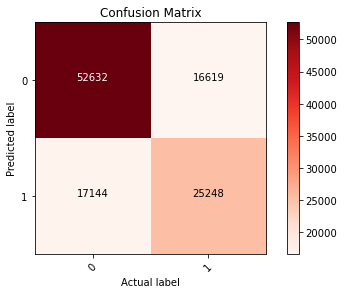

In [661]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc_score_dt = accuracy_score(y_true, y_pred)
f1_scores_dt = f1_score(y_true, y_pred)
recall_scores_dt = recall_score(y_true, y_pred)
precision_scores_dt = precision_score(y_true, y_pred)

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
conf_mat_plot_labels = ['0', '1']
plot_confusion_matrix(cm=conf_mat, classes=conf_mat_plot_labels, title='Confusion Matrix')

In [662]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tabulate in c:\users\zigui oumaro\anaconda3\lib\site-packages (0.9.0)



In [349]:
from tabulate import tabulate
table = [['Model', 'Accuracy', 'F1','Recall','Precision'], ['Decision Tree', acc_score_dt, f1_scores_dt, recall_scores_dt,precision_scores_dt]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════╤════════════╤══════════╤══════════╤═════════════╕
│ Model         │   Accuracy │       F1 │   Recall │   Precision │
╞═══════════════╪════════════╪══════════╪══════════╪═════════════╡
│ Decision Tree │   0.698199 │ 0.600052 │ 0.596245 │    0.603909 │
╘═══════════════╧════════════╧══════════╧══════════╧═════════════╛
